In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colour

import scipy.io as sio

import robsblobs
from robsblobs.monitor import Monitor

A1:  0.1788  rob:  0.165211588417  colour:  0.178793144152
A2:  0.0192  rob:  0.017500044139  colour:  0.0192182214504
T1:  0.0287  rob:  0.02327853974  colour:  0.0286942732668
T2:  0.0205  rob:  0.0162721900122  colour:  0.0205377444256
D1:  0.0108  rob:  0.00821228368055  colour:  0.0107584518764
D2:  0.0108  rob:  0.00821228368055  colour:  0.0107584518764
Br:  0.1814  rob:  0.167045505665  colour:  0.181400369352
C:  1.206  rob:  1.0415437446  colour:  1.20640604875
H:  1.91  rob:  63.2207375133  colour:  1.90898696779
A1:  0.2031  rob:  0.230121999403  colour:  0.203125990238
A2:  0.0224  rob:  0.0261968993446  colour:  0.0224268161234
T1:  0.068  rob:  0.0835824044625  colour:  0.0679770854226
T2:  0.0308  rob:  0.0395206569822  colour:  0.030751915509
D1:  0.0005  rob:  0.00253095105761  colour:  0.000480759131717
D2:  0.0005  rob:  0.00253095105761  colour:  0.000480759131717
Br:  0.2142  rob:  0.244843947563  colour:  0.21419916709
C:  1.371  rob:  1.51169098802  colour:  1.3

In [2]:
plt.close('all')

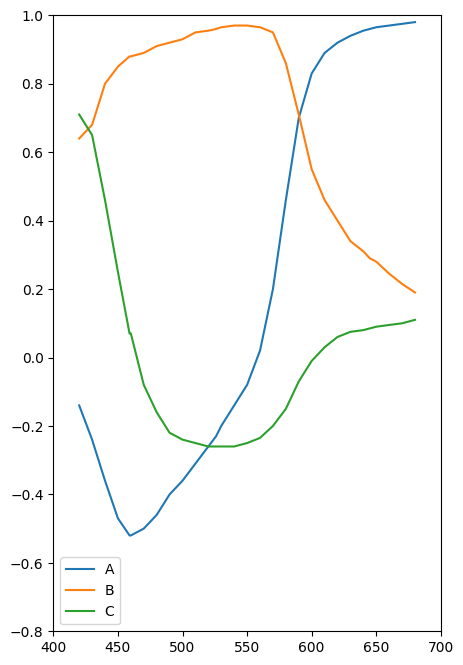

In [3]:
plt.figure(figsize=(5, 8))
plt.plot(robsblobs.guth_vector.wlns, robsblobs.guth_vector.A, label="A")
plt.plot(robsblobs.guth_vector.wlns, robsblobs.guth_vector.B, label="B")
plt.plot(robsblobs.guth_vector.wlns, robsblobs.guth_vector.C, label="C")
plt.ylim(-0.8, 1.0)
plt.xlim(400, 700)
plt.legend()

In [6]:
# from slide 101 of karl's "luminance 100 years talk"
alice_monxyY = np.array([[0.6793, 0.3080, 42.3777],
                        [0.2075, 0.6928, 98.7218],
                        [0.1528, 0.0510, 8.2405]])

# found in one of the matlab folders
alice_gamma = np.array([2.1452, 2.1489, 2.0831])

cie_transform = np.array([[0.6883, 0.1326, 0.0379],
                        [-0.0656, 1.0000, -0.0844],
                        [-0.0244, -0.1164, 0.9792]])

AliceWeight_mw = np.array([0.44, 0.46, 0.1])
AliceWeight_sw = np.array([0.41, 0.44, 0.15])

RGB_weights_sRGB = np.array([0.2126, 0.7152, 0.0722])

RGB_weights_aliceMonitor = np.array([43.8726816818746, 100.422336391086, 8.66744700006506])
RGB_weights_aliceMonitor = RGB_weights_aliceMonitor/RGB_weights_aliceMonitor.sum()

RGB_weights_radiance_aliceMonitor = np.array([0.334350089660000, 0.211504326128800, 0.143650257850000])

In [7]:
data = sio.loadmat('./oled_rgb_mode.mat')
oled_spect = data['data']

black = np.array([0, 0, 0])

rs = np.array([[32, 0, 0],
	[64, 0, 0],
	[83, 0, 0],
	[128, 0, 0],
	[160, 0, 0],
	[192, 0, 0],
	[220, 0, 0],
	[255, 0, 0]])

gs = np.array([[0, 32, 0],
	[0, 64, 0],
	[0, 83, 0],
	[0, 128, 0],
	[0, 160, 0],
	[0, 192, 0],
	[0, 220, 0],
	[0, 255, 0]])

bs = np.array([[0, 0, 32],
	[0, 0, 64],
	[0, 0, 83],
	[0, 0, 128],
	[0, 0, 160],
	[0, 0, 192],
	[0, 0, 220],
	[0, 0, 255]])

white = np.array([255, 255, 255])

# the individual intensity levels in 8-bit rgb format
intens = [0, 32, 64, 83, 128, 160, 192, 220, 255]

# the order in which the different primary intensities were displayed
# during browser calibration.
ki = 0
ris = [1, 2, 3, 4, 5, 6, 7, 8]
gis = [9, 10, 11, 12, 13, 14, 15, 16]
bis = [17, 18, 19, 20, 21, 22, 23, 24]
wi = 25

In [8]:
oled_R_max_spectrum = (oled_spect[0][ris[len(ris)-1]][0]['spectralData'][0]).flatten()
oled_R_max_luminance = oled_spect[0][ris[len(ris)-1]][0]['Y'][0][0].flatten()[0]
oled_R_x = oled_spect[0][ris[len(ris)-1]][0]['x'][0][0].flatten()[0]
oled_R_y = oled_spect[0][ris[len(ris)-1]][0]['y'][0][0].flatten()[0]

oled_G_max_spectrum = (oled_spect[0][gis[len(gis)-1]][0]['spectralData'][0]).flatten()
oled_G_max_luminance = oled_spect[0][gis[len(gis)-1]][0]['Y'][0][0].flatten()[0]
oled_G_x = oled_spect[0][gis[len(gis)-1]][0]['x'][0][0].flatten()[0]
oled_G_y = oled_spect[0][gis[len(gis)-1]][0]['y'][0][0].flatten()[0]

oled_B_max_spectrum = (oled_spect[0][bis[len(bis)-1]][0]['spectralData'][0]).flatten()
oled_B_max_luminance = oled_spect[0][bis[len(bis)-1]][0]['Y'][0][0].flatten()[0]
oled_B_x = oled_spect[0][bis[len(bis)-1]][0]['x'][0][0].flatten()[0]
oled_B_y = oled_spect[0][bis[len(bis)-1]][0]['y'][0][0].flatten()[0]

oled_W_max_spectrum = (oled_spect[0][wi][0]['spectralData'][0]).flatten()
oled_W_max_luminance = oled_spect[0][wi][0]['Y'][0][0].flatten()[0]
oled_W_x = oled_spect[0][wi][0]['x'][0][0].flatten()[0]
oled_W_y = oled_spect[0][wi][0]['y'][0][0].flatten()[0]

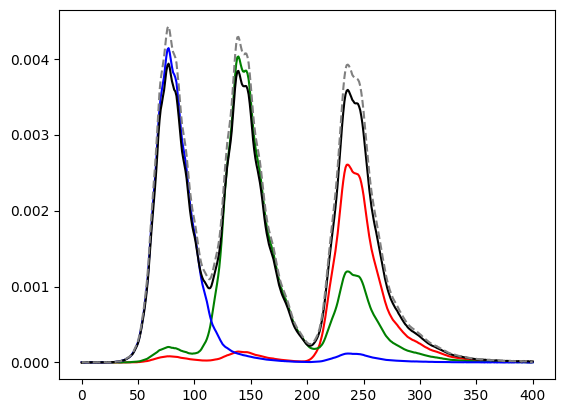

In [9]:
fig = plt.figure()
plt.plot(oled_R_max_spectrum, color="red")
plt.plot(oled_G_max_spectrum, color="green")
plt.plot(oled_B_max_spectrum, color="blue")
plt.plot(oled_W_max_spectrum, color="black")
plt.plot(oled_R_max_spectrum + oled_G_max_spectrum + oled_B_max_spectrum, color="gray", linestyle="dashed")
plt.show()

In [10]:
# oled gamut from shuchen
monxyY_OLED_shuchen = np.array([[0.6326, 0.3306, 28.8920],
                        [0.2979, 0.6013, 98.4700],
                        [0.1509, 0.0630, 11.6410]])
monxyY_OLED_shuchen

array([[  6.32600000e-01,   3.30600000e-01,   2.88920000e+01],
       [  2.97900000e-01,   6.01300000e-01,   9.84700000e+01],
       [  1.50900000e-01,   6.30000000e-02,   1.16410000e+01]])

In [11]:
monxyY_OLED_rob = np.array([[oled_R_x, oled_R_y, oled_R_max_luminance],
                            [oled_G_x, oled_G_y, oled_G_max_luminance],
                            [oled_B_x, oled_B_y, oled_B_max_luminance]])
monxyY_OLED_rob

array([[  6.32600000e-01,   3.30600000e-01,   2.88920000e+01],
       [  2.97900000e-01,   6.01300000e-01,   9.84700000e+01],
       [  1.50900000e-01,   6.30000000e-02,   1.16410000e+01]])

In [12]:
np.abs(monxyY_OLED_shuchen - monxyY_OLED_rob)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [13]:
monitor_OLED = Monitor("OLED")

monitor_OLED.set_monxyY(monxyY_OLED_rob)

monitor_OLED.set_R_spectrum(monitor_OLED.wlns, oled_R_max_spectrum, oled_R_max_luminance)
monitor_OLED.set_G_spectrum(monitor_OLED.wlns, oled_G_max_spectrum, oled_G_max_luminance)
monitor_OLED.set_B_spectrum(monitor_OLED.wlns, oled_B_max_spectrum, oled_B_max_luminance)
monitor_OLED.set_W_spectrum(monitor_OLED.wlns, oled_W_max_spectrum, oled_W_max_luminance)
monitor_OLED.calc_spectralQuants()

# monitor_OLED.set_monGamma()

Luminances[ 0 ] =  14.446
Luminances[ 1 ] =  49.235
Luminances[ 2 ] =  5.8205
bigl = 45.275393329  bigm = 24.226106671  bigs = 1.32641551352
L/L+M = 0.651430448681  S/L+M = 0.0190847034023
Red Green Axis
Luminances[ 0 ] =  0.0
Luminances[ 1 ] =  63.7470964669
Luminances[ 2 ] =  5.75440353314
bigl = 42.0778145708  bigm = 27.4236854292  bigs = 1.32641551352
L/L+M = 0.605423114189  S/L+M = 0.0190847034023
Luminances[ 0 ] =  28.892
Luminances[ 1 ] =  34.7229035331
Luminances[ 2 ] =  5.88659646686
bigl = 48.4729720873  bigm = 21.0285279127  bigs = 1.32641551352
L/L+M = 0.697437783174  S/L+M = 0.0190847034023
Blue Yellow Axis
Luminances[ 0 ] =  11.5659258708
Luminances[ 1 ] =  57.9355741292
Luminances[ 2 ] =  0.0
bigl = 45.275393329  bigm = 24.226106671  bigs = 0.176873064414
L/L+M = 0.651430448681  S/L+M = 0.00254488125312
Luminances[ 0 ] =  17.3260741292
Luminances[ 1 ] =  40.5344258708
Luminances[ 2 ] =  11.641
bigl = 45.275393329  bigm = 24.226106671  bigs = 2.47595796262
L/L+M = 0.65143

In [14]:
jing_monitor_data = sio.loadmat('./jing_monitor_primaries_all.mat')

monxyY_Jing = jing_monitor_data['Shanghai_Lenovo']['monxyY'][0][0]

jing_r_spectrum = jing_monitor_data['Shanghai_Lenovo']['red_primary_spectrum'][0][0].flatten()
jing_g_spectrum = jing_monitor_data['Shanghai_Lenovo']['green_primary_spectrum'][0][0].flatten()
jing_b_spectrum = jing_monitor_data['Shanghai_Lenovo']['blue_primary_spectrum'][0][0].flatten()

jing_estimated_w_spectrum = jing_r_spectrum + jing_g_spectrum + jing_b_spectrum

jing_wlns = jing_monitor_data['Shanghai_Lenovo']['wavelength'][0][0].flatten()

jing_R_max_luminance = monxyY_Jing[0, 2]
jing_G_max_luminance = monxyY_Jing[1, 2]
jing_B_max_luminance = monxyY_Jing[2, 2]

jing_estimated_w_luminance = jing_R_max_luminance + jing_G_max_luminance + jing_B_max_luminance

In [15]:
monxyY_Jing_from_code = np.array([[0.64, 0.34,  16.5],
                        [0.30, 0.61,  59.0],
                        [0.15, 0.073, 8.7]])
monxyY_Jing_from_code

array([[  0.64 ,   0.34 ,  16.5  ],
       [  0.3  ,   0.61 ,  59.   ],
       [  0.15 ,   0.073,   8.7  ]])

In [16]:
monxyY_Jing

array([[  0.64 ,   0.34 ,  16.5  ],
       [  0.3  ,   0.61 ,  59.   ],
       [  0.15 ,   0.073,   8.7  ]])

In [17]:
np.abs(monxyY_Jing - monxyY_Jing_from_code)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [18]:
monitor_Jing = Monitor("Jing")
monitor_Jing.set_monxyY(monxyY_Jing)

monitor_Jing.set_R_spectrum(jing_wlns, jing_r_spectrum, jing_R_max_luminance)
monitor_Jing.set_G_spectrum(jing_wlns, jing_g_spectrum, jing_G_max_luminance)
monitor_Jing.set_B_spectrum(jing_wlns, jing_b_spectrum, jing_B_max_luminance)
monitor_Jing.set_W_spectrum(jing_wlns, jing_estimated_w_spectrum, jing_estimated_w_luminance)
monitor_Jing.calc_spectralQuants()

monitor_Jing.set_monGamma(np.array([2.156, 2.2482, 2.178]))

Luminances[ 0 ] =  8.25
Luminances[ 1 ] =  29.5
Luminances[ 2 ] =  4.35
bigl = 27.233358081  bigm = 14.866641919  bigs = 0.822306084094
L/L+M = 0.646873113564  S/L+M = 0.0195322110236
Red Green Axis
Luminances[ 0 ] =  0.0
Luminances[ 1 ] =  37.8197311787
Luminances[ 2 ] =  4.28026882126
bigl = 25.4366780274  bigm = 16.6633219726  bigs = 0.822306084094
L/L+M = 0.60419662773  S/L+M = 0.0195322110236
Luminances[ 0 ] =  16.5
Luminances[ 1 ] =  21.1802688213
Luminances[ 2 ] =  4.41973117874
bigl = 29.0300381346  bigm = 13.0699618654  bigs = 0.822306084094
L/L+M = 0.689549599398  S/L+M = 0.0195322110236
Blue Yellow Axis
Luminances[ 0 ] =  6.21221327112
Luminances[ 1 ] =  35.8877867289
Luminances[ 2 ] =  0.0
bigl = 27.233358081  bigm = 14.866641919  bigs = 0.0910183261092
L/L+M = 0.646873113564  S/L+M = 0.00216195548953
Luminances[ 0 ] =  10.2877867289
Luminances[ 1 ] =  23.1122132711
Luminances[ 2 ] =  8.7
bigl = 27.233358081  bigm = 14.866641919  bigs = 1.55359384208
L/L+M = 0.646873113564 

In [19]:
monitor_P3 = Monitor("P3")
monitor_P3.load_monxyY("./p3_xyY.csv")
monitor_P3.load_spectralData("./SPECTRA_Karl_22-Jun-2023.mat")
monitor_P3.set_monGamma(np.array([2.2, 2.2, 2.2]))

Luminances[ 0 ] =  155.025
Luminances[ 1 ] =  537.3
Luminances[ 2 ] =  58.5
bigl = 487.166752573  bigm = 263.658247427  bigs = 12.9490841739
L/L+M = 0.648841943959  S/L+M = 0.0172464744433
Red Green Axis
Luminances[ 0 ] =  0.0
Luminances[ 1 ] =  693.096695243
Luminances[ 2 ] =  57.7283047566
bigl = 445.042767369  bigm = 305.782232631  bigs = 12.9490841739
L/L+M = 0.592738344313  S/L+M = 0.0172464744433
Luminances[ 0 ] =  310.05
Luminances[ 1 ] =  381.503304757
Luminances[ 2 ] =  59.2716952434
bigl = 529.290737778  bigm = 221.534262222  bigs = 12.9490841739
L/L+M = 0.704945543606  S/L+M = 0.0172464744433
Blue Yellow Axis
Luminances[ 0 ] =  133.053315227
Luminances[ 1 ] =  617.771684773
Luminances[ 2 ] =  0.0
bigl = 487.166752573  bigm = 263.658247427  bigs = 0.647854479857
L/L+M = 0.648841943959  S/L+M = 0.000862856830629
Luminances[ 0 ] =  176.996684773
Luminances[ 1 ] =  456.828315227
Luminances[ 2 ] =  117.0
bigl = 487.166752573  bigm = 263.658247427  bigs = 25.250313868
L/L+M = 0.64

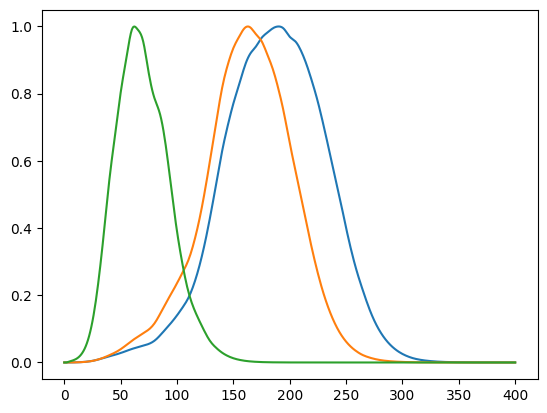

In [20]:
plt.plot(monitor_P3.l_adj)
plt.plot(monitor_P3.m_adj)
plt.plot(monitor_P3.s_adj)

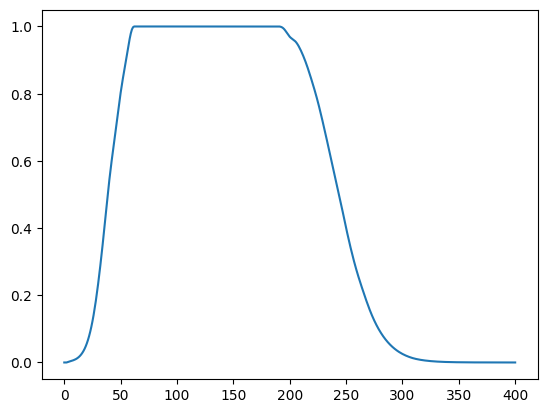

In [21]:
plt.plot(monitor_P3.visibleRadianceWindow)

[34.631, 120.06, 13.074, 167.58000000000001, 167.76500000000001]


array([ 0.20665354,  0.71643394,  0.07801647])

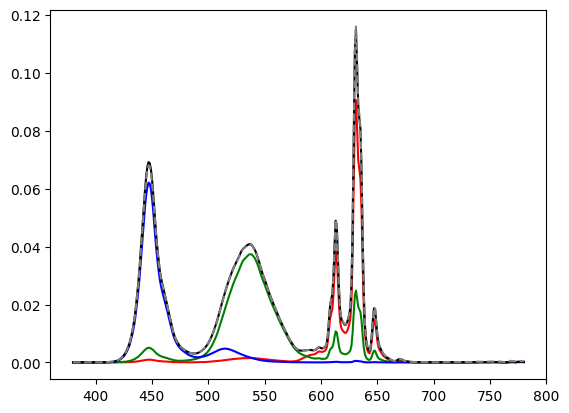

In [22]:
# Karl's monitor was in a mode that limits the maximum that the RGB primaries can reach,
# so we compute a correction factor here based on the reports in the G0 paper that the
# monitor can ideally reach a max of 1500 cd/m2 (confirmed in Apple's tech report about
# the monitor).

rlum = monitor_P3.R_max_luminance
glum = monitor_P3.G_max_luminance
blum = monitor_P3.B_max_luminance

corrf = [monitor_P3.monxyY[0, 2]/rlum,
         monitor_P3.monxyY[1, 2]/glum,
         monitor_P3.monxyY[2, 2]/blum]

monitor_P3.R_max_luminance = monitor_P3.monxyY[0, 2]
monitor_P3.G_max_luminance = monitor_P3.monxyY[1, 2]
monitor_P3.B_max_luminance = monitor_P3.monxyY[2, 2]

wlum = monitor_P3.W_max_luminance

w_corrf = monitor_P3.monWP[1]/wlum

monitor_P3.R_max_spectrum = monitor_P3.R_max_spectrum*corrf[0]
monitor_P3.G_max_spectrum = monitor_P3.G_max_spectrum*corrf[1]
monitor_P3.B_max_spectrum = monitor_P3.B_max_spectrum*corrf[2]

monitor_P3.W_max_spectrum = monitor_P3.W_max_spectrum*w_corrf

monitor_P3.maxRadiance = monitor_P3.W_max_spectrum.sum()

plt.plot(monitor_P3.wlns, monitor_P3.R_max_spectrum, color="red")
plt.plot(monitor_P3.wlns, monitor_P3.G_max_spectrum, color="green")
plt.plot(monitor_P3.wlns, monitor_P3.B_max_spectrum, color="blue")
plt.plot(monitor_P3.wlns, monitor_P3.W_max_spectrum, color="black")
plt.plot(monitor_P3.wlns, monitor_P3.R_max_spectrum + monitor_P3.G_max_spectrum + monitor_P3.B_max_spectrum, color="grey", linestyle="dashed")

print([rlum, glum, blum, wlum, rlum+glum+blum])
[rlum, glum, blum]/wlum

In [27]:
# this gives the same output as a test program at this page:
# https://www.opticsthewebsite.com/Nayatani

Eor = 1500
Eor = 1000 # normalizing illuminance

XYZ_stim = np.array([57.06, 43.06, 31.96])
xy_stim = robsblobs.cie_standard.XYZ2xy(XYZ_stim)

Yo_bg = 1 # should be ratio to monWP[1]

# should be monWP
XYZ_illum = np.array([109.85, 100.00, 35.58]) # illuminant A
xy_illum = robsblobs.cie_standard.XYZ2xy(XYZ_illum)

Eo = XYZ_illum[1] # should be monWP[1]
Eo = 500

Y_stim = XYZ_stim[1]/Eo

robsblobs.nayatani_insanity.robNT(xy_stim, Y_stim, Yo_bg, xy_illum, Eo, Eor)

{'Brightness': 66.185461446343595,
 'Lightness': 71.671426440337115,
 'Normalized Lightness': 74.305214003572843,
 'Hue Angle': 345.19463797862863,
 'Saturation': 23.906848996698418,
 'Chroma': 30.759946023546931,
 'Colorfulness': 27.398632100503534,
 'Achromatic Response': 21.671426440337118,
 'RG Response': 0.10912477870004382,
 'YB Response': -0.028842935813721576}

In [28]:
# stimulus
XYZ = np.array([19.01, 20.00, 21.78])

# illuminant
XYZ_w = np.array([95.05, 100.00, 108.88])

# adapting field luminance (of illuminant)
L_A = 318.31

# adapting field Y values (reflected from background)
Y_b = 20.0

# surround conditions
surround = colour.appearance.ciecam02.VIEWING_CONDITIONS_CIECAM02['Average']

ciecam02 = colour.XYZ_to_CIECAM02(XYZ, XYZ_w, L_A, Y_b, surround)

ciecam02.Q

195.37132596607671

In [31]:
brightnesses_white = {
    'maxRGB': 0,
    # 'maxRGB_Random': 0,
    'maxRGB_Shuchen': 0,
    'maxRGB_G0': 0,
    'ware_cowan': 0,
    'fairchildL': 0,
    'Lstar': 0,
    'HSP': 0,
    'HSP_JingWeights': 0,
    'HSP_Jing_new': 0,
    'maxLMS': 0,
    'brilliance': 0,
    'brill_macadam': 0,
    'luminance': 0,
    'radiance': 0,
    'chroma': 0,
    'visibleRadiance': 0,
    'Nayatani Br': 0,
    'Nayatani Lp': 0,
    'Nayatani Ln': 0,
    'CAM16 Avg Q': 0,
    'CAM16 Avg J': 0,
    'CAM16 Dim Q': 0,
    'CAM16 Dim J': 0,
    'CAM16 Dark Q': 0,
    'CAM16 Dark J': 0,
    'Guth': 0,
    'JzAzBz': 0,
    'sumRGB': 0,
    'sumRGB_Shuchen': 0,
    'ware_cowan': 0,
    'Hunt_Q Tele': 0,
    'Hunt_WB Tele': 0,
    'Hunt_Q Norm': 0,
    'Hunt_WB Norm': 0,
    'Hunt_Q Small': 0,
    'Hunt_WB Small': 0,
    'JingB': 0,
    'JingB_new': 0,
    'ATD': 0,
    'Hellwig Avg Q': 0,
    'Hellwig Avg J': 0,
    'Hellwig Dim Q': 0,
    'Hellwig Dim J': 0,
    'Hellwig Dark Q': 0,
    'Hellwig Dark J': 0,
    'SVF': 0
}

d65_xy = robsblobs.cie_standard.XYZ2xy(monitor_OLED.monWP)

lstar = 100
astar = 0
bstar = 0

lab = np.array([lstar, astar, bstar])
xyz = robsblobs.infamous_lab.lab2xyz(monitor_OLED, lab)
xyY = robsblobs.cie_standard.XYZ2xyY(xyz)
rgb = robsblobs.cie_monitor_helpers.xyz2rgb(monitor_OLED, xyz)
lms = robsblobs.lms.rgb2lms(monitor_OLED, rgb)

r = rgb[0]
g = rgb[1]
b = rgb[2]

xy_desat = 0.4*xyY[0:2] + 0.6*d65_xy

brightnesses_white['Lstar'] = 100

brightnesses_white['maxRGB'] = robsblobs.maxRGB_revolution.maxRGB(rgb)
# brightnesses_white['maxRGB_Random'] = robsblobs.maxRGB_revolution.maxRGB_Random(rgb)
brightnesses_white['maxRGB_Shuchen'] = robsblobs.maxRGB_revolution.maxRGB_Shuchen(rgb)

brightnesses_white['sumRGB'] = robsblobs.sumrgb.sumRGB(rgb)
brightnesses_white['sumRGB_Shuchen'] = robsblobs.sumrgb.sumRGB_Shuchen(rgb)

brightnesses_white['maxRGB_G0'] = robsblobs.maxRGB_revolution.maxRGB_G0(rgb)
brightnesses_white['ware_cowan'] = robsblobs.ware_cowan.ware_cowan(xyY)
brightnesses_white['fairchildL'] = robsblobs.fairchildL.rgb2FairchildLstar(monitor_OLED, rgb)

hsp = robsblobs.funny_dude_discovers_maxRGB_in_adobe.RGBtoHSP(r, g, b, "photoshop")
brightnesses_white['HSP'] = hsp[2]

hsp = robsblobs.funny_dude_discovers_maxRGB_in_adobe.RGBtoHSP(r, g, b, "jing")
brightnesses_white['HSP_JingWeights'] = hsp[2]

hsp = robsblobs.funny_dude_discovers_maxRGB_in_adobe.RGBtoHSP(r, g, b, "jing_new")
brightnesses_white['HSP_Jing_new'] = hsp[2]

brightnesses_white['JingB'] = robsblobs.jingHSP.jingHSP(rgb, "old")
brightnesses_white['JingB_new'] = robsblobs.jingHSP.jingHSP(rgb)

brightnesses_white['maxLMS'] = robsblobs.lms.maxLMS(lms)

brightnesses_white['brilliance'] = robsblobs.G0_brilliance.brilliance(monitor_OLED, rgb)

xyY_desat = np.array([xy_desat[0], xy_desat[1], xyY[2]])
rgb_desat = robsblobs.cie_monitor_helpers.xyY2rgb(monitor_OLED, xyY_desat)
brightnesses_white['brilliance_desat'] = robsblobs.G0_brilliance.brilliance(monitor_OLED, rgb_desat)

brightnesses_white['brill_macadam'] = robsblobs.G0_brilliance.brilliance_macadam(monitor_OLED, rgb)

brightnesses_white['luminance'] = robsblobs.cie_monitor_helpers.luminance(monitor_OLED, rgb)
brightnesses_white['radiance'] = robsblobs.radiance.radiance(monitor_OLED, rgb)
brightnesses_white['chroma'] = robsblobs.infamous_lab.chroma(monitor_OLED, rgb)

brightnesses_white['visibleRadiance'] = robsblobs.radiance.visibleRadiance(monitor_OLED, rgb)

brightnesses_white['Guth'] = robsblobs.guth_vector.guth_lum_rgb(monitor_OLED, rgb)

jaz = robsblobs.jazzy.jazzy(monitor_OLED, rgb)
brightnesses_white['JzAzBz'] = robsblobs.jazzy.jaz_lightness(jaz)

XYZ_w = monitor_OLED.monWP
L_A = 0.2*monitor_OLED.monWP[1]
Y_b = 0.001
surround = colour.appearance.VIEWING_CONDITIONS_CAM16["Average"]
cam16 = colour.appearance.XYZ_to_CAM16(xyz, XYZ_w, L_A, Y_b, surround) 
brightnesses_white['CAM16 Avg Q'] = cam16.Q
brightnesses_white['CAM16 Avg J'] = cam16.J

surround = colour.appearance.VIEWING_CONDITIONS_CAM16["Dim"]
cam16 = colour.appearance.XYZ_to_CAM16(xyz, XYZ_w, L_A, Y_b, surround) 
brightnesses_white['CAM16 Dim Q'] = cam16.Q
brightnesses_white['CAM16 Dim J'] = cam16.J

surround = colour.appearance.VIEWING_CONDITIONS_CAM16["Dark"]
cam16 = colour.appearance.XYZ_to_CAM16(xyz, XYZ_w, L_A, Y_b, surround) 
brightnesses_white['CAM16 Dark Q'] = cam16.Q
brightnesses_white['CAM16 Dark J'] = cam16.J

Eo = monitor_OLED.monWP[1]
Eor = 1000
Y_stim = xyY[2]/Eo
Yo_bg = 0 # we had a black background for all experiments
xy_illum = robsblobs.cie_standard.XYZ2xy(monitor_OLED.monWP)
xy_stim = xyY[0:2]
nt_res = robsblobs.nayatani_insanity.robNT(xyY[0:2], Y_stim, Yo_bg, xy_illum, Eo, Eor)
brightnesses_white['Nayatani Br'] = nt_res['Brightness']
brightnesses_white['Nayatani Lp'] = nt_res['Lightness']
brightnesses_white['Nayatani Ln'] = nt_res['Normalized Lightness']

# values for Nc, Nb
# small area, uniform surround = 1.0, 300
# normal scenes = 1.0, 75
# television, dim surround = 1.0, 25
# transparencies, light box = 0.7, 25
# transparencies, dark surround = 0.7, 10
xyz_stim = robsblobs.cie_standard.xyY2XYZ(np.array([xy_stim[0], xy_stim[1], xyY[2]]))
xyz_illum = robsblobs.cie_standard.xyY2XYZ(np.array([xy_illum[0], xy_illum[1], Eo]))
xy_adapt = np.array([0.33, 0.33])
Yref_adapt = 0.001
xyz_adapt = robsblobs.cie_standard.xyY2XYZ(np.array([xy_adapt[0], xy_adapt[1], Yref_adapt*Eo]))
xy_bkgd = np.array([0.33, 0.33])
Yref_bkgd = 0.001
xyz_bkgd = robsblobs.cie_standard.xyY2XYZ(np.array([xy_bkgd[0], xy_bkgd[1], Yref_bkgd*Eo]))
Nc = 1.0
Nb = 25
hunt_res = robsblobs.hunt.hunt_brightness(xyz_stim, xyz_illum, Eo, xyz_adapt, xyz_bkgd, Nc, Nb, True, False)
brightnesses_white['Hunt_Q Tele'] = hunt_res['Q']
brightnesses_white['Hunt_WB Tele'] = hunt_res['WB']

Nc = 1.0
Nb = 75
hunt_res = robsblobs.hunt.hunt_brightness(xyz_stim, xyz_illum, Eo, xyz_adapt, xyz_bkgd, Nc, Nb, True, False)
brightnesses_white['Hunt_Q Norm'] = hunt_res['Q']
brightnesses_white['Hunt_WB Norm'] = hunt_res['WB']

Nc = 1.0
Nb = 300
hunt_res = robsblobs.hunt.hunt_brightness(xyz_stim, xyz_illum, Eo, xyz_adapt, xyz_bkgd, Nc, Nb, True, False)
brightnesses_white['Hunt_Q Small'] = hunt_res['Q']
brightnesses_white['Hunt_WB Small'] = hunt_res['WB']

# we were viewing in related colors mode
atd_k_1 = 1.0
atd_k_2 = 5.0
atd_res = colour.appearance.atd95.XYZ_to_ATD95(xyz, monitor_OLED.monWP, Yref_adapt, atd_k_1, atd_k_2)
brightnesses_white['ATD'] = atd_res.Q

surr = colour.appearance.hellwig2022.VIEWING_CONDITIONS_HELLWIG2022["Dim"]
hf_res = colour.appearance.XYZ_to_Hellwig2022(xyz, monitor_OLED.monWP, Yref_adapt, Yref_bkgd, surr)
brightnesses_white['Hellwig Dim Q'] = hf_res.Q_HK
brightnesses_white['Hellwig Dim J'] = hf_res.J_HK

surr = colour.appearance.hellwig2022.VIEWING_CONDITIONS_HELLWIG2022["Average"]
hf_res = colour.appearance.XYZ_to_Hellwig2022(xyz, monitor_OLED.monWP, Yref_adapt, Yref_bkgd, surr)
brightnesses_white['Hellwig Avg Q'] = hf_res.Q_HK
brightnesses_white['Hellwig Avg J'] = hf_res.J_HK

surr = colour.appearance.hellwig2022.VIEWING_CONDITIONS_HELLWIG2022["Dark"]
hf_res = colour.appearance.XYZ_to_Hellwig2022(xyz, monitor_OLED.monWP, Yref_adapt, Yref_bkgd, surr)
brightnesses_white['Hellwig Dark Q'] = hf_res.Q_HK
brightnesses_white['Hellwig Dark J'] = hf_res.J_HK

svf_res = robsblobs.svf.svf(xyz, monitor_OLED.monWP)
brightnesses_white['SVF'] = svf_res[2]

In [32]:
xyz

array([ 131.95219266,  139.003     ,  164.97705392])

In [33]:
brightnesses_white

{'maxRGB': 1.0000000000000004,
 'maxRGB_Shuchen': 0.4499999999999999,
 'maxRGB_G0': 0.42763097999999988,
 'ware_cowan': 2.1521473337010688,
 'fairchildL': 100.0,
 'Lstar': 100,
 'HSP': 1.0,
 'HSP_JingWeights': 1.0,
 'HSP_Jing_new': 1.0000499987500624,
 'maxLMS': 0.21764357031196649,
 'brilliance': 0.53605674703547845,
 'brill_macadam': 0.87367861514258727,
 'luminance': 1.0,
 'radiance': 1.1113496991670502,
 'chroma': 0.0,
 'visibleRadiance': 1.1153901438964848,
 'Nayatani Br': 110.3805698882188,
 'Nayatani Lp': 110.3805698882188,
 'Nayatani Ln': 110.3948229310339,
 'CAM16 Avg Q': 1464.4168351073733,
 'CAM16 Avg J': 100.0,
 'CAM16 Dim Q': 1712.0311372989843,
 'CAM16 Dim J': 100.0,
 'CAM16 Dark Q': 1923.327297486717,
 'CAM16 Dark J': 100.0,
 'Guth': 0.37702301124844351,
 'JzAzBz': 0.19112360829406511,
 'sumRGB': 3.0,
 'sumRGB_Shuchen': 1.0,
 'Hunt_Q Tele': 203.41929562020596,
 'Hunt_WB Tele': 696.24246253487615,
 'Hunt_Q Norm': 167.43902968796263,
 'Hunt_WB Norm': 671.55680159005612,
 '

In [34]:
nhues = 100
thetas = np.linspace(0, 2*np.pi, nhues)

brightnesses_hue = {
    'maxRGB': np.zeros((nhues)),
    # 'maxRGB_Random': np.zeros((nhues)),
    'maxRGB_Shuchen': np.zeros((nhues)),
    'maxRGB_G0': np.zeros((nhues)),
    'ware_cowan': np.zeros((nhues)),
    'fairchildL': np.zeros((nhues)),
    'Lstar': np.zeros((nhues)),
    'HSP': np.zeros((nhues)),
    'maxLMS': np.zeros((nhues)),
    'brilliance': np.zeros((nhues)),
    'luminance': np.zeros((nhues)),
    'radiance': np.zeros((nhues)),
    'visibleRadiance': np.zeros((nhues)),
    'Nayatani Br': np.zeros((nhues))
}

c = 0
lstar = 31
cstar = 20
lab_vals_hue = np.zeros((nhues, 3))
rgb_vals_hue = np.zeros((nhues, 3))
for theta in thetas:
    astar = cstar*np.cos(theta)
    bstar = cstar*np.sin(theta)

    lab = np.array([lstar, astar, bstar])
    lab_vals_hue[c, :] = lab
    xyz = robsblobs.infamous_lab.lab2xyz(monitor_P3, lab)
    xyY = robsblobs.cie_standard.XYZ2xyY(xyz)
    rgb = robsblobs.cie_monitor_helpers.xyz2rgb(monitor_P3, xyz)
    rgb_vals_hue[c, :] = robsblobs.cie_monitor_helpers.xyz2rgb(monitor_OLED, robsblobs.infamous_lab.lab2xyz(monitor_OLED, lab))
    lms = robsblobs.lms.rgb2lms(monitor_P3, rgb)

    r = rgb[0]
    g = rgb[1]
    b = rgb[2]

    brightnesses_hue['Lstar'][c] = lstar

    brightnesses_hue['maxRGB'][c] = robsblobs.maxRGB_revolution.maxRGB(rgb)
    # brightnesses_hue['maxRGB_Random'][c] = robsblobs.maxRGB_revolution.maxRGB_Random(rgb)
    brightnesses_hue['maxRGB_Shuchen'][c] = robsblobs.maxRGB_revolution.maxRGB_Shuchen(rgb)
    brightnesses_hue['maxRGB_G0'][c] = robsblobs.maxRGB_revolution.maxRGB_G0(rgb)
    brightnesses_hue['ware_cowan'][c] = robsblobs.ware_cowan.ware_cowan(xyY)
    brightnesses_hue['fairchildL'][c] = robsblobs.fairchildL.rgb2FairchildLstar(monitor_P3, rgb)

    hsp = robsblobs.funny_dude_discovers_maxRGB_in_adobe.RGBtoHSP(r, g, b, "photoshop")
    brightnesses_hue['HSP'][c] = hsp[2]

    brightnesses_hue['maxLMS'][c] = robsblobs.lms.maxLMS(lms)
    brightnesses_hue['brilliance'][c] = robsblobs.G0_brilliance.brilliance(monitor_P3, rgb)

    brightnesses_hue['luminance'][c] = robsblobs.cie_monitor_helpers.luminance(monitor_P3, rgb)
    brightnesses_hue['radiance'][c] = robsblobs.radiance.radiance(monitor_P3, rgb)
    brightnesses_hue['visibleRadiance'][c] = robsblobs.radiance.visibleRadiance(monitor_P3, rgb)

    Eo = monitor_P3.monWP[1]
    Eor = 1000
    Y_stim = xyY[2]/Eo
    Yo_bg = 0 # we had a black background for all experiments
    xy_illum = robsblobs.cie_standard.XYZ2xy(monitor_P3.monWP)
    xy_stim = xyY[0:2]
    nt_res = robsblobs.nayatani_insanity.robNT(xy_stim, Y_stim, Yo_bg, xy_illum, Eo, Eor)
    brightnesses_hue['Nayatani Br'][c] = nt_res['Brightness']

    c += 1

for metric in brightnesses_hue:
    bvals = brightnesses_hue[metric]
    bvals = bvals - bvals[0]
    bvals = bvals/brightnesses_white[metric]
    brightnesses_hue[metric] = bvals

/tmp/ipykernel_43648/4164096944.py:1: RuntimeWarning: invalid value encountered in sqrt
  plt.scatter(thetas[::3], np.ones_like(thetas[::3]), color=np.sqrt(rgb_vals_hue[::3, :]*5.0), marker='s')


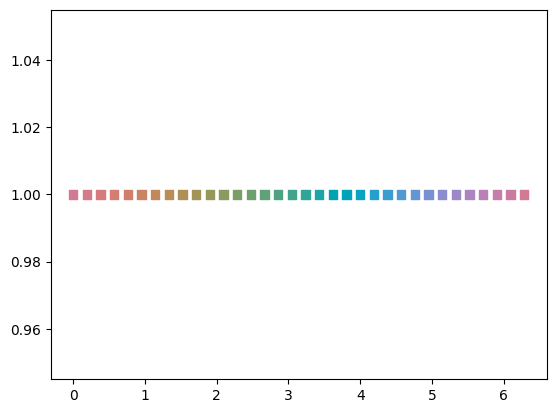

In [35]:
plt.scatter(thetas[::3], np.ones_like(thetas[::3]), color=np.sqrt(rgb_vals_hue[::3, :]*5.0), marker='s')

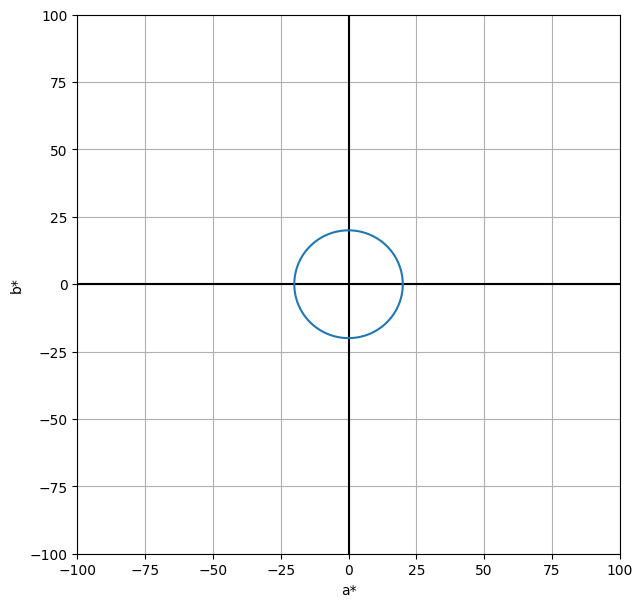

In [36]:
fig, ax = robsblobs.plotting.AB_fig(monitor_P3, [-100, 100], [-100, 100])
ax.plot(lab_vals_hue[:, 1], lab_vals_hue[:, 2])

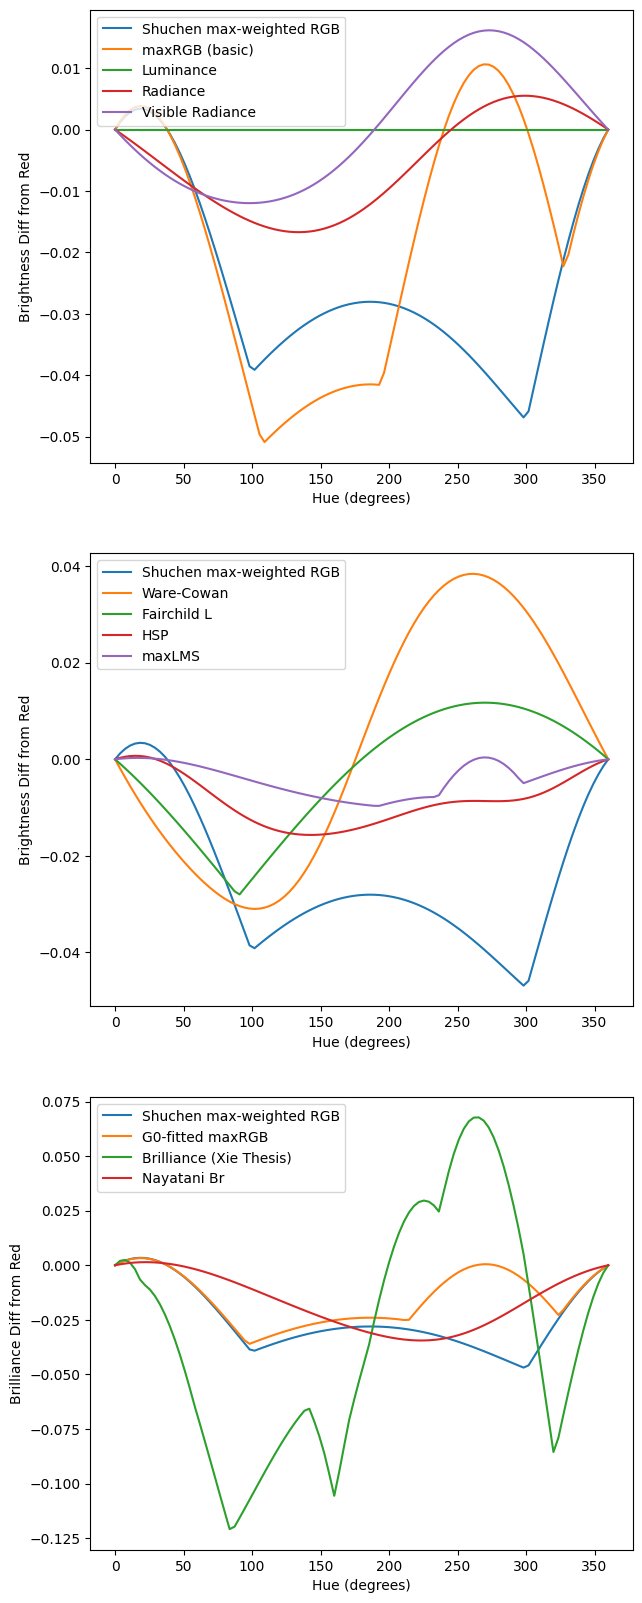

In [37]:
fig, ax = plt.subplots(3, 1, figsize = (7, 20))
ax[0].plot(np.rad2deg(thetas), brightnesses_hue['maxRGB_Shuchen'], label='Shuchen max-weighted RGB')
ax[0].plot(np.rad2deg(thetas), brightnesses_hue['maxRGB'], label='maxRGB (basic)')
# ax[0].plot(np.rad2deg(thetas), brightnesses_hue['maxRGB_Random'], label='maxRGB random weights')
ax[0].plot(np.rad2deg(thetas), brightnesses_hue['luminance'], label='Luminance')
ax[0].plot(np.rad2deg(thetas), brightnesses_hue['radiance'], label='Radiance')
ax[0].plot(np.rad2deg(thetas), brightnesses_hue['visibleRadiance'], label='Visible Radiance')
ax[0].set_xlabel('Hue (degrees)')
ax[0].set_ylabel('Brightness Diff from Red')
ax[0].legend()

ax[1].plot(np.rad2deg(thetas), brightnesses_hue['maxRGB_Shuchen'], label='Shuchen max-weighted RGB')
ax[1].plot(np.rad2deg(thetas), brightnesses_hue['ware_cowan'], label='Ware-Cowan')
ax[1].plot(np.rad2deg(thetas), brightnesses_hue['fairchildL'], label='Fairchild L')
ax[1].plot(np.rad2deg(thetas), brightnesses_hue['HSP'], label='HSP')
ax[1].plot(np.rad2deg(thetas), brightnesses_hue['maxLMS'], label='maxLMS')
ax[1].set_xlabel('Hue (degrees)')
ax[1].set_ylabel('Brightness Diff from Red')
ax[1].legend()

ax[2].plot(np.rad2deg(thetas), brightnesses_hue['maxRGB_Shuchen'], label='Shuchen max-weighted RGB')
ax[2].plot(np.rad2deg(thetas), brightnesses_hue['maxRGB_G0'], label='G0-fitted maxRGB')
ax[2].plot(np.rad2deg(thetas), brightnesses_hue['brilliance'], label='Brilliance (Xie Thesis)')
ax[2].plot(np.rad2deg(thetas), brightnesses_hue['Nayatani Br'], label='Nayatani Br')
ax[2].set_xlabel('Hue (degrees)')
ax[2].set_ylabel('Brilliance Diff from Red')
ax[2].legend()

In [38]:
theta = np.pi/4
ncs = 10

brightnesses_chroma = {
    'maxRGB': np.zeros((ncs)),
    # 'maxRGB_Random': np.zeros((ncs)),
    'maxRGB_Shuchen': np.zeros((ncs)),
    'maxRGB_G0': np.zeros((ncs)),
    'ware_cowan': np.zeros((ncs)),
    'fairchildL': np.zeros((ncs)),
    'Lstar': np.zeros((ncs)),
    'HSP': np.zeros((ncs)),
    'maxLMS': np.zeros((ncs)),
    'brilliance': np.zeros((ncs)),
    'luminance': np.zeros((ncs)),
    'radiance': np.zeros((ncs)),
    'visibleRadiance': np.zeros((ncs)),
    'Nayatani Br': np.zeros((ncs))
}

c = 0
lstar = 31
cstars = np.linspace(0, 40, ncs)
lab_vals_chroma = np.zeros((ncs, 3))
rgb_vals_chroma = np.zeros((ncs, 3))
for cstar in cstars:
    astar = cstar*np.cos(theta)
    bstar = cstar*np.sin(theta)

    lab = np.array([lstar, astar, bstar])
    lab_vals_chroma[c, :] = lab
    xyz = robsblobs.infamous_lab.lab2xyz(monitor_P3, lab)
    xyY = robsblobs.cie_standard.XYZ2xyY(xyz)
    rgb = robsblobs.cie_monitor_helpers.xyz2rgb(monitor_P3, xyz)
    rgb_vals_chroma[c, :] = robsblobs.cie_monitor_helpers.xyz2rgb(monitor_OLED, robsblobs.infamous_lab.lab2xyz(monitor_OLED, lab))
    lms = robsblobs.lms.rgb2lms(monitor_P3, rgb)

    r = rgb[0]
    g = rgb[1]
    b = rgb[2]

    brightnesses_chroma['Lstar'][c] = lstar

    brightnesses_chroma['maxRGB'][c] = robsblobs.maxRGB_revolution.maxRGB(rgb)
    # brightnesses_chroma['maxRGB_Random'][c] = robsblobs.maxRGB_revolution.maxRGB_Random(rgb)
    brightnesses_chroma['maxRGB_Shuchen'][c] = robsblobs.maxRGB_revolution.maxRGB_Shuchen(rgb)
    brightnesses_chroma['maxRGB_G0'][c] = robsblobs.maxRGB_revolution.maxRGB_G0(rgb)
    brightnesses_chroma['ware_cowan'][c] = robsblobs.ware_cowan.ware_cowan(xyY)
    brightnesses_chroma['fairchildL'][c] = robsblobs.fairchildL.rgb2FairchildLstar(monitor_P3, rgb)

    hsp = robsblobs.funny_dude_discovers_maxRGB_in_adobe.RGBtoHSP(r, g, b, "photoshop")
    brightnesses_chroma['HSP'][c] = hsp[2]

    brightnesses_chroma['maxLMS'][c] = robsblobs.lms.maxLMS(lms)
    brightnesses_chroma['brilliance'][c] = robsblobs.G0_brilliance.brilliance(monitor_P3, rgb)

    brightnesses_chroma['luminance'][c] = robsblobs.cie_monitor_helpers.luminance(monitor_P3, rgb)
    brightnesses_chroma['radiance'][c] = robsblobs.radiance.radiance(monitor_P3, rgb)
    brightnesses_chroma['visibleRadiance'][c] = robsblobs.radiance.visibleRadiance(monitor_P3, rgb)

    Eo = monitor_P3.monWP[1]
    Eor = 1000
    Y_stim = xyY[2]/Eo
    Yo_bg = 0 # we always had a black background in all experiments
    xy_illum = robsblobs.cie_standard.XYZ2xy(monitor_P3.monWP)
    xy_stim = xyY[0:2]
    nt_res = robsblobs.nayatani_insanity.robNT(xy_stim, Y_stim, Yo_bg, xy_illum, Eo, Eor)
    brightnesses_chroma['Nayatani Br'][c] = nt_res['Brightness']

    c += 1

for metric in brightnesses_chroma:
    bvals = brightnesses_chroma[metric]
    bvals = bvals - bvals[0]
    bvals = bvals/brightnesses_white[metric]
    brightnesses_chroma[metric] = bvals

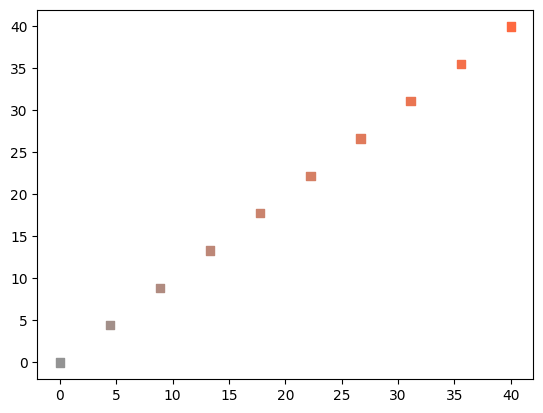

In [39]:
plt.scatter(cstars, cstars, color=np.sqrt(rgb_vals_chroma*5.0), marker='s')

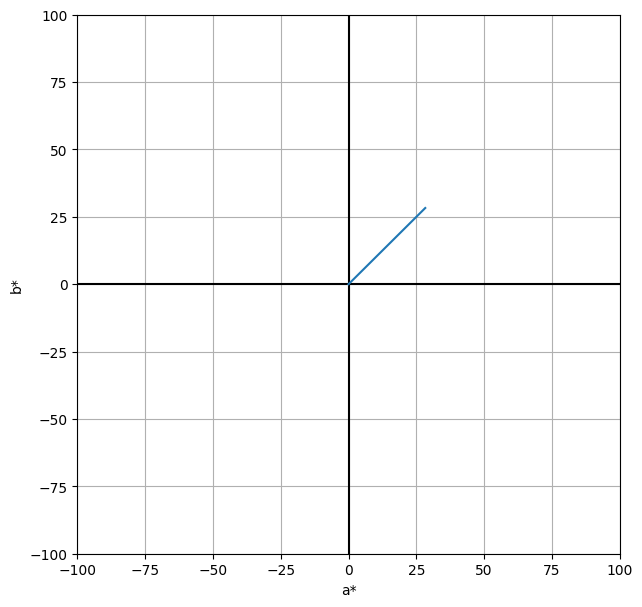

In [40]:
fig, ax = robsblobs.plotting.AB_fig(monitor_P3, [-100, 100], [-100, 100])
ax.plot(lab_vals_chroma[:, 1], lab_vals_chroma[:, 2])

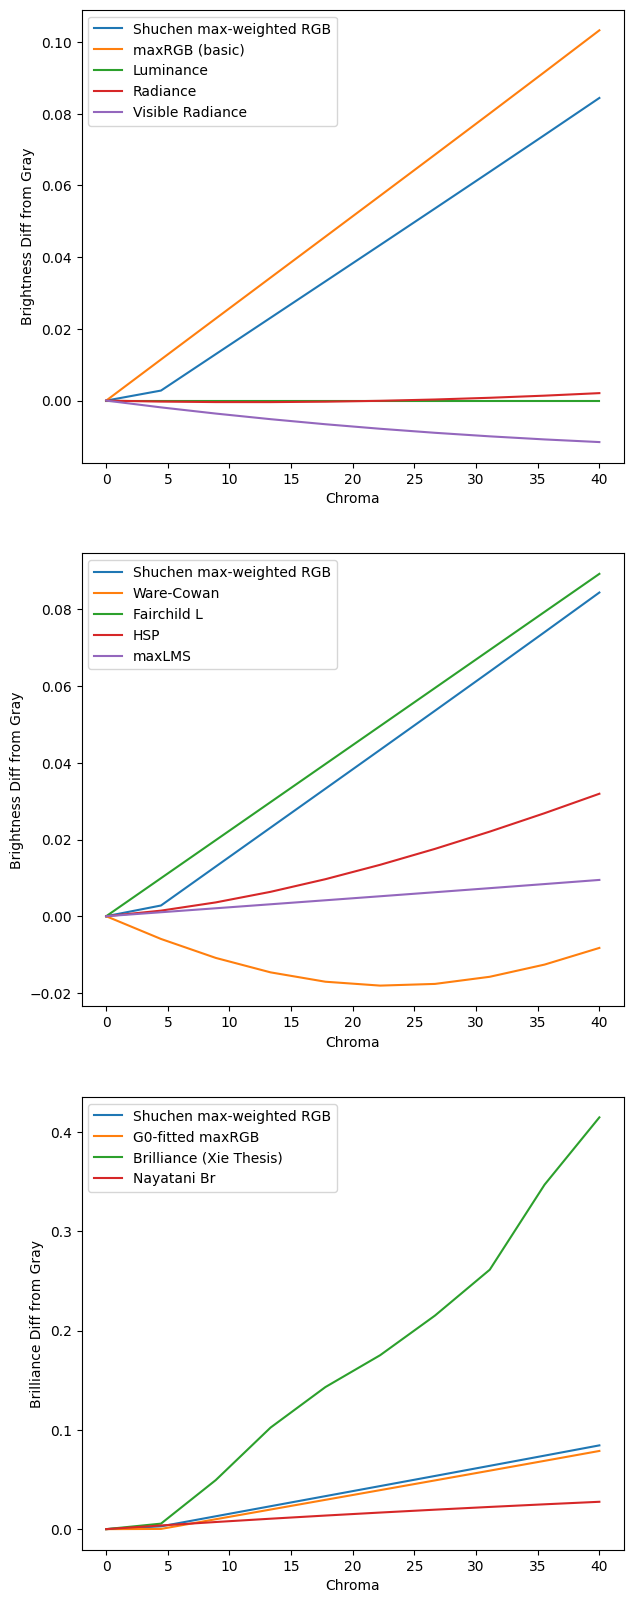

In [41]:
fig, ax = plt.subplots(3, 1, figsize = (7, 20))
ax[0].plot(cstars, brightnesses_chroma['maxRGB_Shuchen'], label='Shuchen max-weighted RGB')
ax[0].plot(cstars, brightnesses_chroma['maxRGB'], label='maxRGB (basic)')
# ax[0].plot(cstars, brightnesses_chroma['maxRGB_Random'], label='maxRGB random weights')
ax[0].plot(cstars, brightnesses_chroma['luminance'], label='Luminance')
ax[0].plot(cstars, brightnesses_chroma['radiance'], label='Radiance')
ax[0].plot(cstars, brightnesses_chroma['visibleRadiance'], label='Visible Radiance')
ax[0].set_xlabel('Chroma')
ax[0].set_ylabel('Brightness Diff from Gray')
ax[0].legend()

ax[1].plot(cstars, brightnesses_chroma['maxRGB_Shuchen'], label='Shuchen max-weighted RGB')
ax[1].plot(cstars, brightnesses_chroma['ware_cowan'], label='Ware-Cowan')
ax[1].plot(cstars, brightnesses_chroma['fairchildL'], label='Fairchild L')
ax[1].plot(cstars, brightnesses_chroma['HSP'], label='HSP')
ax[1].plot(cstars, brightnesses_chroma['maxLMS'], label='maxLMS')
ax[1].set_xlabel('Chroma')
ax[1].set_ylabel('Brightness Diff from Gray')
ax[1].legend()

ax[2].plot(cstars, brightnesses_chroma['maxRGB_Shuchen'], label='Shuchen max-weighted RGB')
ax[2].plot(cstars, brightnesses_chroma['maxRGB_G0'], label='G0-fitted maxRGB')
ax[2].plot(cstars, brightnesses_chroma['brilliance'], label='Brilliance (Xie Thesis)')
ax[2].plot(cstars, brightnesses_chroma['Nayatani Br'], label='Nayatani Br')
ax[2].set_xlabel('Chroma')
ax[2].set_ylabel('Brilliance Diff from Gray')
ax[2].legend()

In [42]:
data = sio.loadmat('corrTrials_60.mat')
colorList = data['corrTrials_60']
allRGB = np.reshape(colorList, (colorList.shape[0]*colorList.shape[1], colorList.shape[2]))

In [43]:
allLAB = np.zeros(allRGB.shape)
for c in range(len(allRGB)):
    allLAB[c, :] = robsblobs.infamous_lab.rgb2lab(monitor_P3, allRGB[c, :])

allLs = allLAB[:, 0].squeeze()
allas = allLAB[:, 1].squeeze()
allbs = allLAB[:, 2].squeeze()

In [44]:
data_obs_ranks = sio.loadmat('CubeRank.mat')
obsRanks = data_obs_ranks['CubeRank']
obsRanks = np.reshape(obsRanks, (obsRanks.shape[0]*obsRanks.shape[1]))

# extrapolate based on missing data
goodpts = obsRanks != 0
obsRanks = obsRanks[goodpts]
# obsRanks[obsRanks == 0] = np.NaN

In [45]:
data = sio.loadmat('AllCubes.mat')
allCubes = data['AllCubes']
allCubes = np.reshape(allCubes, (allCubes.shape[0]*allCubes.shape[1], allCubes.shape[2]))
allCubes = allCubes[goodpts, :]

orig_hues = np.array([
    0,
    30,
    60,
    90,
    120,
    150,
    180,
    210,
    240,
    270,
    300,
    330
])

orig_vs = np.array([
    0.1,
    0.16,
    0.23,
    0.30,
    0.35,
    0.42,
    0.48,
    0.54,
    0.61,
    0.67,
    0.74,
    0.80
])

ncs = allCubes.shape[0]
ranks_all_cubes = {
    'ObsRanks': np.zeros((ncs)),
    'JingB': np.zeros((ncs)),
    'JingB_new': np.zeros((ncs)),
    'maxRGB_Shuchen': np.zeros((ncs)),
    'HSP': np.zeros((ncs)),
    'HSP_JingWeights': np.zeros((ncs)),
    'HSP_Jing_new': np.zeros((ncs)),
    'maxRGB': np.zeros((ncs)),
    'maxRGB_G0': np.zeros((ncs)),
    'sumRGB': np.zeros((ncs)),
    'sumRGB_Shuchen': np.zeros((ncs)),
    'ware_cowan': np.zeros((ncs)),
    'Lstar': np.zeros((ncs)),
    'fairchildL': np.zeros((ncs)),
    'maxLMS': np.zeros((ncs)),
    'brilliance': np.zeros((ncs)),
    'brilliance_desat': np.zeros((ncs)),
    'brill_macadam': np.zeros((ncs)),
    'luminance': np.zeros((ncs)),
    'radiance': np.zeros((ncs)),
    'chroma': np.zeros((ncs)),
    'visibleRadiance': np.zeros((ncs)),
    'Nayatani Br': np.zeros((ncs)),
    'Nayatani Lp': np.zeros((ncs)),
    'Nayatani Ln': np.zeros((ncs)),
    'CAM16 Avg Q': np.zeros((ncs)),
    'CAM16 Avg J': np.zeros((ncs)),
    'CAM16 Dim Q': np.zeros((ncs)),
    'CAM16 Dim J': np.zeros((ncs)),
    'CAM16 Dark Q': np.zeros((ncs)),
    'CAM16 Dark J': np.zeros((ncs)),
    'Guth': np.zeros((ncs)),
    'JzAzBz': np.zeros((ncs)),
    'Hunt_Q Tele': np.zeros((ncs)),
    'Hunt_WB Tele': np.zeros((ncs)),
    'Hunt_Q Norm': np.zeros((ncs)),
    'Hunt_WB Norm': np.zeros((ncs)),
    'Hunt_Q Small': np.zeros((ncs)),
    'Hunt_WB Small': np.zeros((ncs)),
    'ATD': np.zeros((ncs)),
    'Hellwig Avg Q': np.zeros((ncs)),
    'Hellwig Avg J': np.zeros((ncs)),
    'Hellwig Dim Q': np.zeros((ncs)),
    'Hellwig Dim J': np.zeros((ncs)),
    'Hellwig Dark Q': np.zeros((ncs)),
    'Hellwig Dark J': np.zeros((ncs)),
    'SVF': np.zeros((ncs))
}

d65_xy = robsblobs.cie_standard.XYZ2xy(monitor_OLED.monWP)

all_xy = np.zeros((ncs, 2))
allCubes_plot = np.zeros((ncs, 3))
brill_all_xy = np.zeros((ncs, 2))
hues = np.zeros((len(allCubes_plot)))

for cc in range(len(allCubes)):
    hues[cc] = np.mod(cc, 12)

    # observer rankings were saved in a different format
    ranks_all_cubes['ObsRanks'][cc] = 13 - obsRanks[cc]

    rgb = allCubes[cc, :]
    allCubes_plot[cc, :] = np.sqrt(rgb)
    
    r = rgb[0]
    g = rgb[1]
    b = rgb[2]

    xyz = robsblobs.cie_monitor_helpers.rgb2xyz(monitor_OLED, rgb)
    xyY = robsblobs.cie_standard.XYZ2xyY(xyz)
    all_xy[cc, :] = xyY[0:2]

    xy_desat = 0.4*xyY[0:2] + 0.6*d65_xy
    brill_all_xy[cc, :] = xy_desat[0:2]

    lms = robsblobs.lms.rgb2lms(monitor_OLED, rgb)

    lab = robsblobs.infamous_lab.rgb2lab(monitor_OLED, rgb)
    ranks_all_cubes['Lstar'][cc] = lab[0]

    ranks_all_cubes['maxRGB'][cc] = robsblobs.maxRGB_revolution.maxRGB(rgb)
    ranks_all_cubes['maxRGB_Shuchen'][cc] = robsblobs.maxRGB_revolution.maxRGB_Shuchen(rgb)
    ranks_all_cubes['maxRGB_G0'][cc] = robsblobs.maxRGB_revolution.maxRGB_G0(rgb)

    ranks_all_cubes['sumRGB'][cc] = robsblobs.sumrgb.sumRGB(rgb)
    ranks_all_cubes['sumRGB_Shuchen'][cc] = robsblobs.sumrgb.sumRGB_Shuchen(rgb)

    ranks_all_cubes['ware_cowan'][cc] = robsblobs.ware_cowan.ware_cowan(xyY)
    ranks_all_cubes['fairchildL'][cc] = robsblobs.fairchildL.rgb2FairchildLstar(monitor_OLED, rgb)

    hsp = robsblobs.funny_dude_discovers_maxRGB_in_adobe.RGBtoHSP(r, g, b, "photoshop")
    ranks_all_cubes['HSP'][cc] = hsp[2]

    hsp = robsblobs.funny_dude_discovers_maxRGB_in_adobe.RGBtoHSP(r, g, b, "jing")
    ranks_all_cubes['HSP_JingWeights'][cc] = hsp[2]

    hsp = robsblobs.funny_dude_discovers_maxRGB_in_adobe.RGBtoHSP(r, g, b, "jing_new")
    ranks_all_cubes['HSP_Jing_new'][cc] = hsp[2]

    ranks_all_cubes['JingB'][cc] = robsblobs.jingHSP.jingHSP(rgb, "old")
    ranks_all_cubes['JingB_new'][cc] = robsblobs.jingHSP.jingHSP(rgb)

    ranks_all_cubes['maxLMS'][cc] = robsblobs.lms.maxLMS(lms)

    ranks_all_cubes['brilliance'][cc] = robsblobs.G0_brilliance.brilliance(monitor_OLED, rgb)

    xyY_desat = np.array([xy_desat[0], xy_desat[1], xyY[2]])
    rgb_desat = robsblobs.cie_monitor_helpers.xyY2rgb(monitor_OLED, xyY_desat)
    ranks_all_cubes['brilliance_desat'][cc] = robsblobs.G0_brilliance.brilliance(monitor_OLED, rgb_desat)

    ranks_all_cubes['brill_macadam'][cc] = robsblobs.G0_brilliance.brilliance_macadam(monitor_OLED, rgb)


    ranks_all_cubes['luminance'][cc] = robsblobs.cie_monitor_helpers.luminance(monitor_OLED, rgb)
    ranks_all_cubes['radiance'][cc] = robsblobs.radiance.radiance(monitor_OLED, rgb)
    ranks_all_cubes['chroma'][cc] = robsblobs.infamous_lab.chroma(monitor_OLED, rgb)

    ranks_all_cubes['visibleRadiance'][cc] = robsblobs.radiance.visibleRadiance(monitor_OLED, rgb)

    ranks_all_cubes['Guth'][cc] = robsblobs.guth_vector.guth_lum_rgb(monitor_OLED, rgb)

    jaz = robsblobs.jazzy.jazzy(monitor_OLED, rgb)
    ranks_all_cubes['JzAzBz'][cc] = robsblobs.jazzy.jaz_lightness(jaz)

    Eo = monitor_OLED.monWP[1]
    Eor = 1000
    Y_stim = xyY[2]/Eo
    Yo_bg = 0 # we always had a black background in all experiments
    xy_illum = robsblobs.cie_standard.XYZ2xy(monitor_OLED.monWP)
    xy_stim = xyY[0:2]
    nt_res = robsblobs.nayatani_insanity.robNT(xy_stim, Y_stim, Yo_bg, xy_illum, Eo, Eor)
    ranks_all_cubes['Nayatani Br'][cc] = nt_res['Brightness']
    ranks_all_cubes['Nayatani Lp'][cc] = nt_res['Lightness']
    ranks_all_cubes['Nayatani Ln'][cc] = nt_res['Normalized Lightness']

    XYZ_w = monitor_OLED.monWP
    L_A = 0.2*monitor_OLED.monWP[1]
    Y_b = 0.001
    surround = colour.appearance.VIEWING_CONDITIONS_CAM16["Average"]
    cam16 = colour.appearance.XYZ_to_CAM16(xyz, XYZ_w, L_A, Y_b, surround) 
    ranks_all_cubes['CAM16 Avg Q'][cc] = cam16.Q
    ranks_all_cubes['CAM16 Avg J'][cc] = cam16.J

    surround = colour.appearance.VIEWING_CONDITIONS_CAM16["Dim"]
    cam16 = colour.appearance.XYZ_to_CAM16(xyz, XYZ_w, L_A, Y_b, surround) 
    ranks_all_cubes['CAM16 Dim Q'][cc] = cam16.Q
    ranks_all_cubes['CAM16 Dim J'][cc] = cam16.J

    surround = colour.appearance.VIEWING_CONDITIONS_CAM16["Dark"]
    cam16 = colour.appearance.XYZ_to_CAM16(xyz, XYZ_w, L_A, Y_b, surround) 
    ranks_all_cubes['CAM16 Dark Q'][cc] = cam16.Q
    ranks_all_cubes['CAM16 Dark J'][cc] = cam16.J

    # values for Nc, Nb
    # small area, uniform surround = 1.0, 300
    # normal scenes = 1.0, 75
    # television, dim surround = 1.0, 25
    # transparencies, light box = 0.7, 25
    # transparencies, dark surround = 0.7, 10
    xyz_stim = robsblobs.cie_standard.xyY2XYZ(np.array([xy_stim[0], xy_stim[1], xyY[2]]))
    xyz_illum = robsblobs.cie_standard.xyY2XYZ(np.array([xy_illum[0], xy_illum[1], Eo]))
    xy_adapt = np.array([0.33, 0.33])
    Yref_adapt = 0.001
    xyz_adapt = robsblobs.cie_standard.xyY2XYZ(np.array([xy_adapt[0], xy_adapt[1], Yref_adapt*Eo]))
    xy_bkgd = np.array([0.33, 0.33])
    Yref_bkgd = 0.001
    xyz_bkgd = robsblobs.cie_standard.xyY2XYZ(np.array([xy_bkgd[0], xy_bkgd[1], Yref_bkgd*Eo]))
    Nc = 1.0
    Nb = 25
    hunt_res = robsblobs.hunt.hunt_brightness(xyz_stim, xyz_illum, Eo, xyz_adapt, xyz_bkgd, Nc, Nb, True, False)
    ranks_all_cubes['Hunt_Q Tele'][cc] = hunt_res['Q']
    ranks_all_cubes['Hunt_WB Tele'][cc] = hunt_res['WB']

    Nc = 1.0
    Nb = 75
    hunt_res = robsblobs.hunt.hunt_brightness(xyz_stim, xyz_illum, Eo, xyz_adapt, xyz_bkgd, Nc, Nb, True, False)
    ranks_all_cubes['Hunt_Q Norm'][cc] = hunt_res['Q']
    ranks_all_cubes['Hunt_WB Norm'][cc] = hunt_res['WB']

    Nc = 1.0
    Nb = 300
    hunt_res = robsblobs.hunt.hunt_brightness(xyz_stim, xyz_illum, Eo, xyz_adapt, xyz_bkgd, Nc, Nb, True, False)
    ranks_all_cubes['Hunt_Q Small'][cc] = hunt_res['Q']
    ranks_all_cubes['Hunt_WB Small'][cc] = hunt_res['WB']

    # we were viewing in related colors mode
    atd_res = colour.appearance.atd95.XYZ_to_ATD95(xyz, monitor_OLED.monWP[1], Yref_adapt, atd_k_1, atd_k_2)
    ranks_all_cubes['ATD'][cc] = atd_res.Q

    surr = colour.appearance.hellwig2022.VIEWING_CONDITIONS_HELLWIG2022["Dim"]
    hf_res = colour.appearance.XYZ_to_Hellwig2022(xyz, monitor_OLED.monWP, Yref_adapt, Yref_bkgd,)
    ranks_all_cubes['Hellwig Dim Q'][cc] = hf_res.Q
    ranks_all_cubes['Hellwig Dim J'][cc] = hf_res.J

    surr = colour.appearance.hellwig2022.VIEWING_CONDITIONS_HELLWIG2022["Average"]
    hf_res = colour.appearance.XYZ_to_Hellwig2022(xyz, monitor_OLED.monWP, Yref_adapt, Yref_bkgd,)
    ranks_all_cubes['Hellwig Avg Q'][cc] = hf_res.Q
    ranks_all_cubes['Hellwig Avg J'][cc] = hf_res.J

    surr = colour.appearance.hellwig2022.VIEWING_CONDITIONS_HELLWIG2022["Dark"]
    hf_res = colour.appearance.XYZ_to_Hellwig2022(xyz, monitor_OLED.monWP, Yref_adapt, Yref_bkgd,)
    ranks_all_cubes['Hellwig Dark Q'][cc] = hf_res.Q
    ranks_all_cubes['Hellwig Dark J'][cc] = hf_res.J

    svf_res = robsblobs.svf.svf(xyz, monitor_OLED.monWP)
    ranks_all_cubes['SVF'][cc] = svf_res[2]

hues = np.sort(hues)

or_min = np.min(ranks_all_cubes['ObsRanks'])
or_max = np.max(ranks_all_cubes['ObsRanks'] - or_min)
for metric in ranks_all_cubes:
    if metric == 'ObsRanks':
        continue

    bvals = ranks_all_cubes[metric]
    if metric == 'chroma':
        bvals = bvals/np.max(bvals)
    elif metric != 'brilliance':
        bvals = bvals/brightnesses_white[metric]
    
    if metric != 'brilliance':
        bvals = bvals - np.min(bvals)
        bvals = bvals/np.max(bvals)
        ranks_all_cubes[metric] = bvals * or_max + or_min
    else:
        gis = np.logical_not(np.isnan(bvals))
        bvals[gis] = bvals[gis]/brightnesses_white[metric]
        bvals[gis] = bvals[gis] - np.min(bvals[gis])
        bvals[gis] = bvals[gis]/np.max(bvals[gis])
        bvals[gis] = bvals[gis] * or_max + or_min
        ranks_all_cubes[metric] = bvals

In [46]:
hues

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
         3.,   3.,   3.,   3.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,
         4.,   4.,   4.,   4.,   4.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   6.,   6.,   6.,   6.,   6.,
         6.,   6.,   6.,   6.,   6.,   6.,   6.,   7.,   7.,   7.,   7.,
         7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   8.,   8.,   8.,
         8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.])

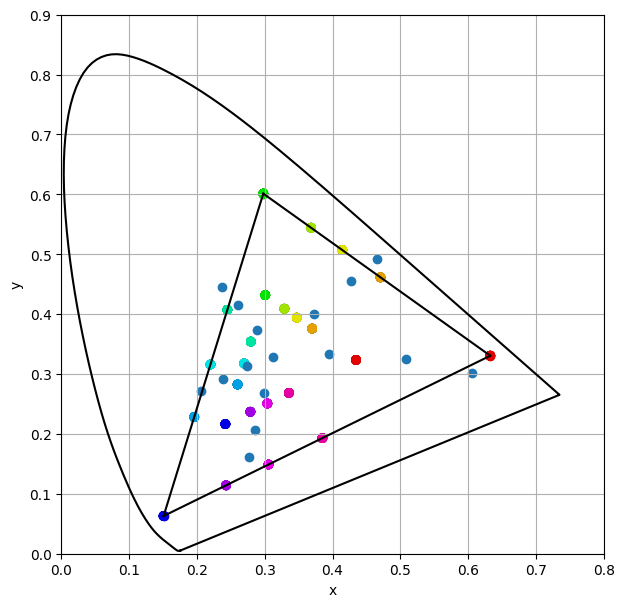

In [47]:
fig, ax = robsblobs.plotting.xyY_fig(monitor_OLED)
ax.scatter(all_xy[:, 0], all_xy[:, 1], color=allCubes_plot)
ax.scatter(brill_all_xy[:, 0], brill_all_xy[:, 1], color=allCubes_plot)
G0_xyY = robsblobs.G0_brilliance.G0_stims_xyY
ax.scatter(G0_xyY[:, 0], G0_xyY[:, 1])

In [48]:
mdic = {
    'brightnesses_all_cubes': ranks_all_cubes,
    'hue_index': hues,
    'allCubesRGB': allCubes_plot
}
sio.savemat('all_models_brightnesses.mat', mdic)

In [49]:
hues.shape

(143,)

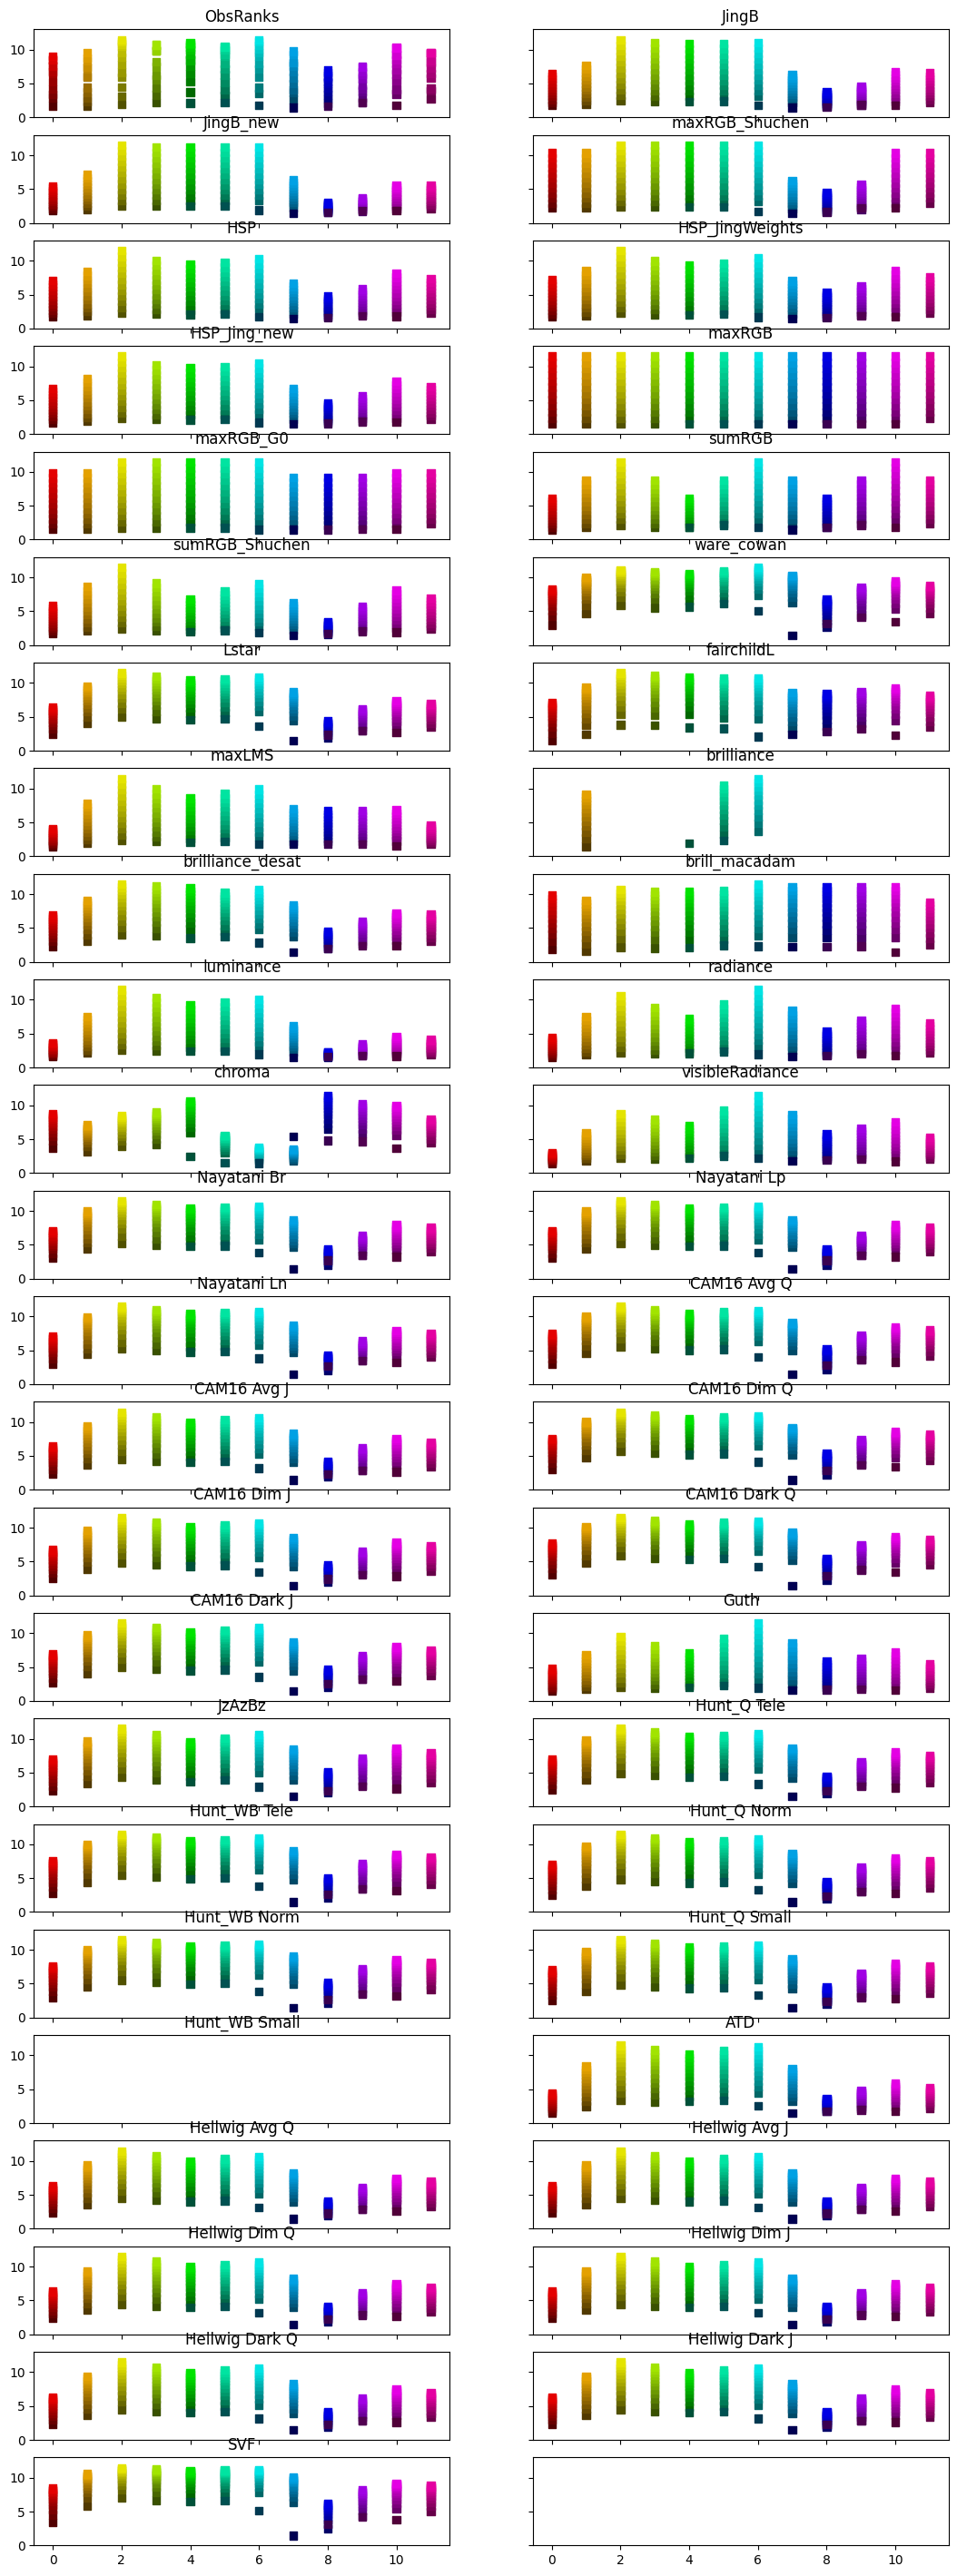

In [50]:
c = 0
fig, ax = plt.subplots(24, 2, figsize=(13, 12*3), sharex=True, sharey=True)
ax = ax.flatten()
for metric in ranks_all_cubes:
    ax[c].scatter(hues, ranks_all_cubes[metric], color=allCubes_plot, marker='s')
    ax[c].set_title(metric)
    ax[c].set_ylim([0, 13])

    c += 1

/tmp/ipykernel_43648/2667926325.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2, figsize=(14, 4))


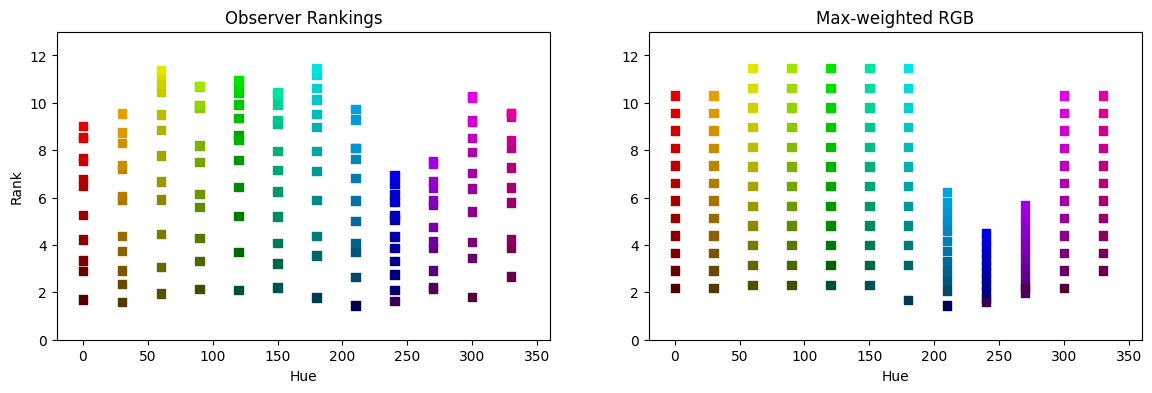

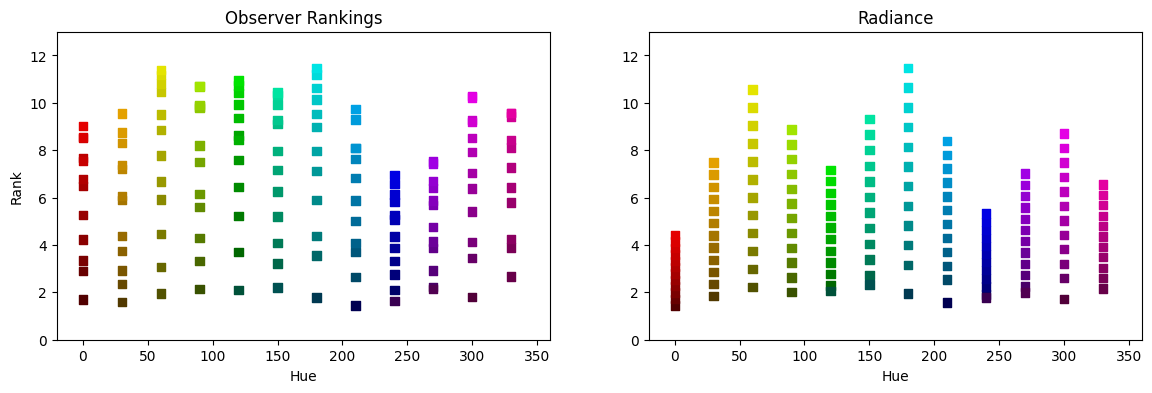

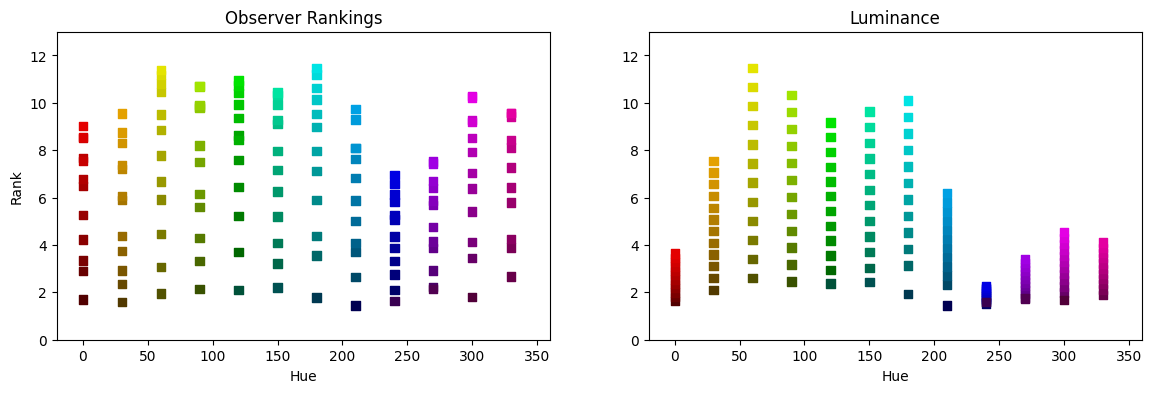

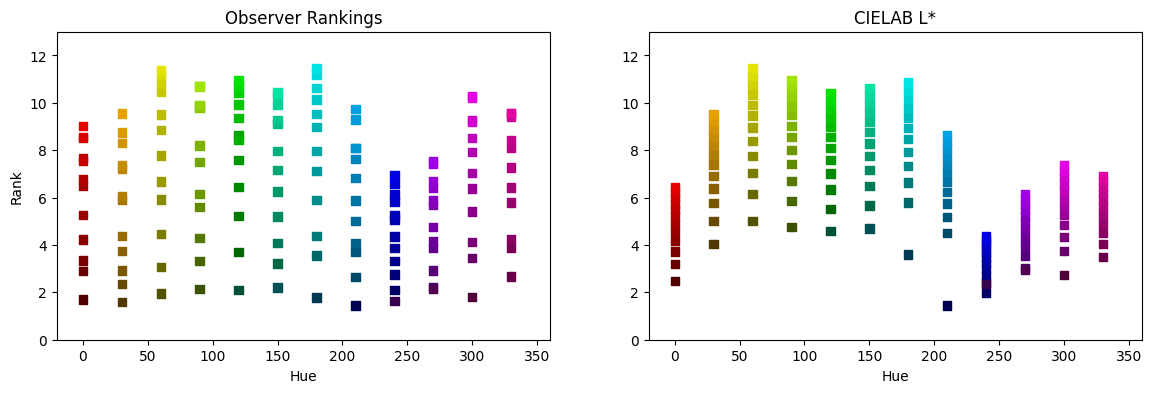

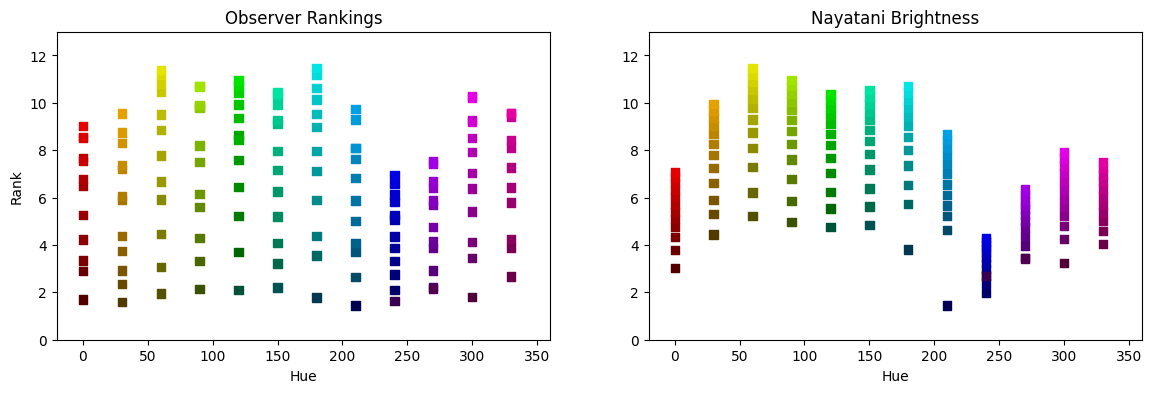

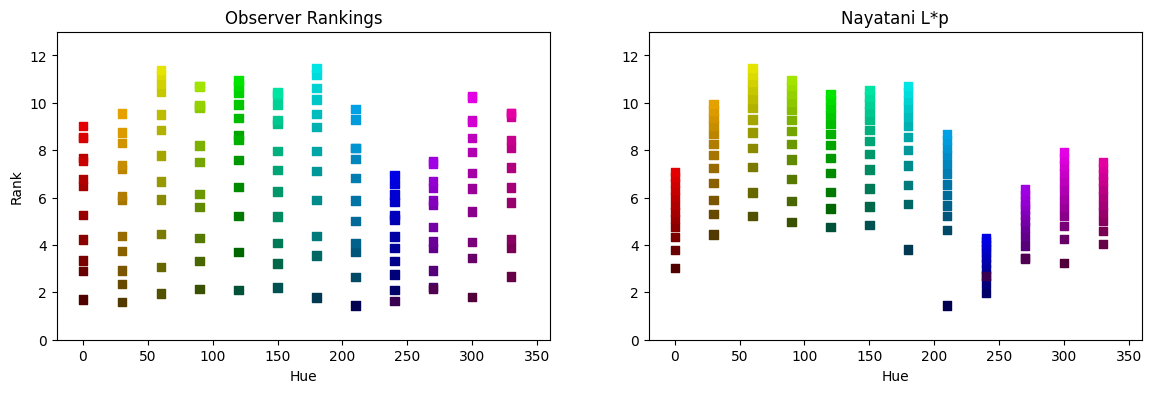

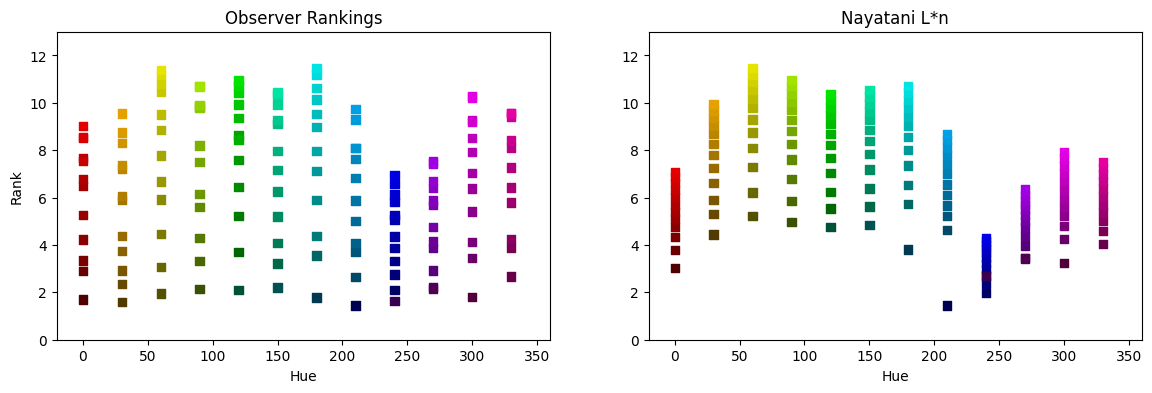

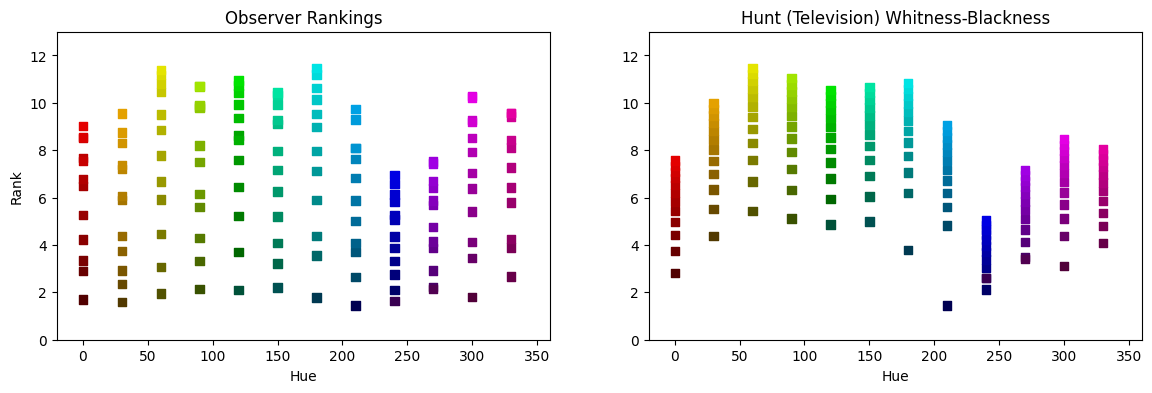

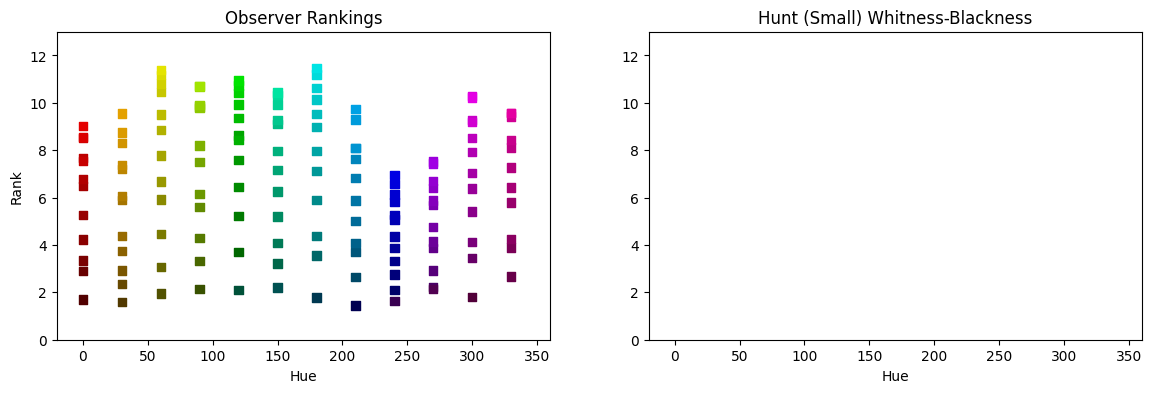

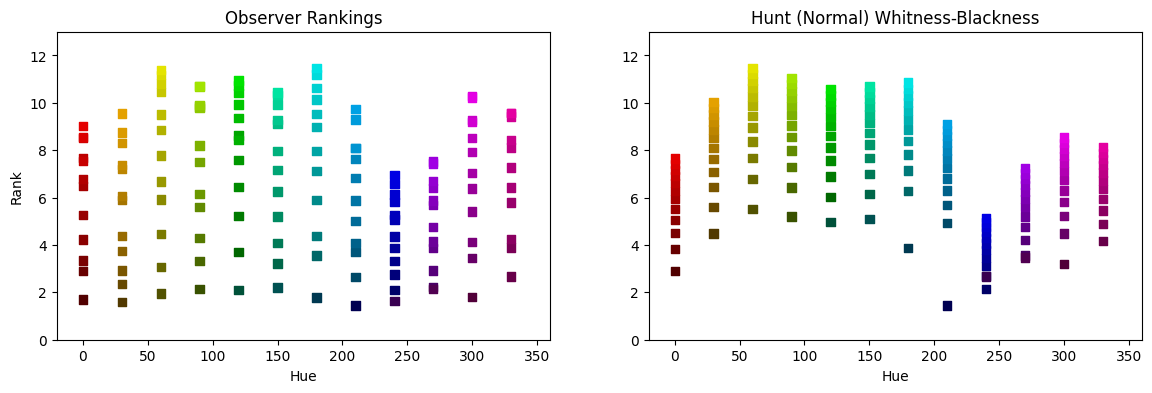

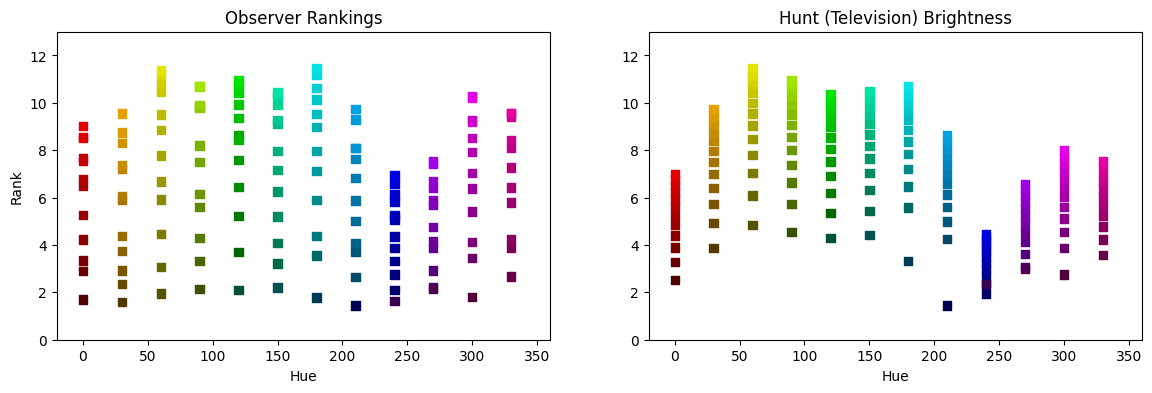

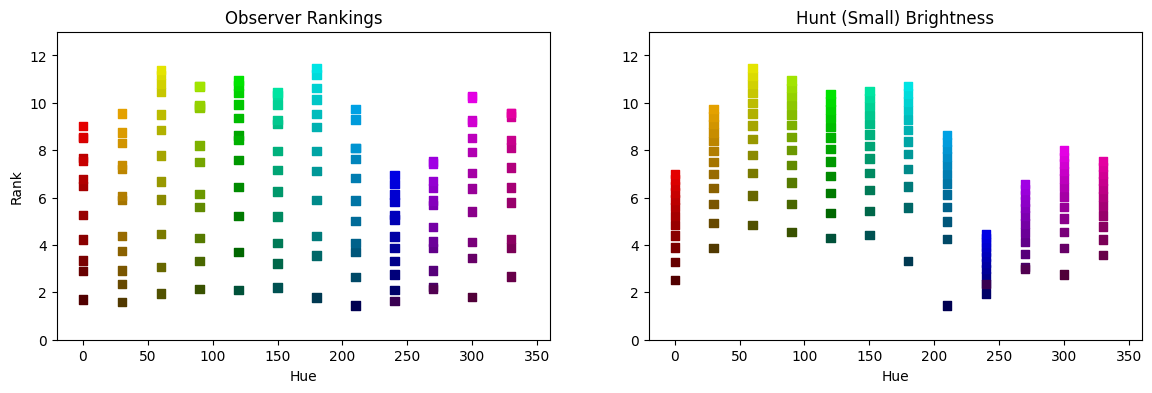

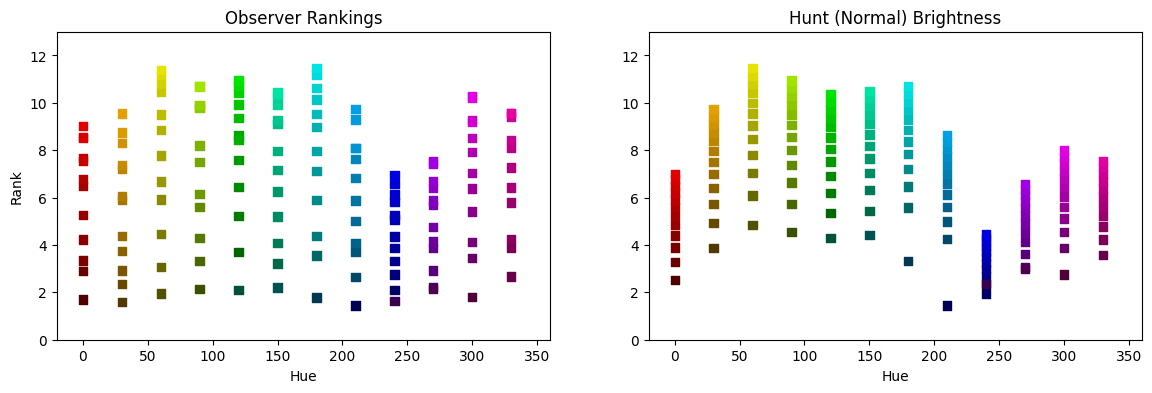

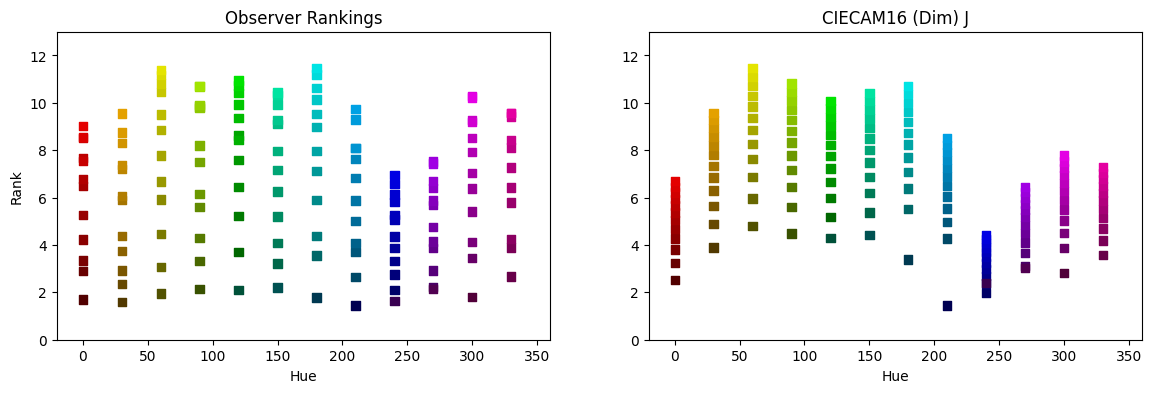

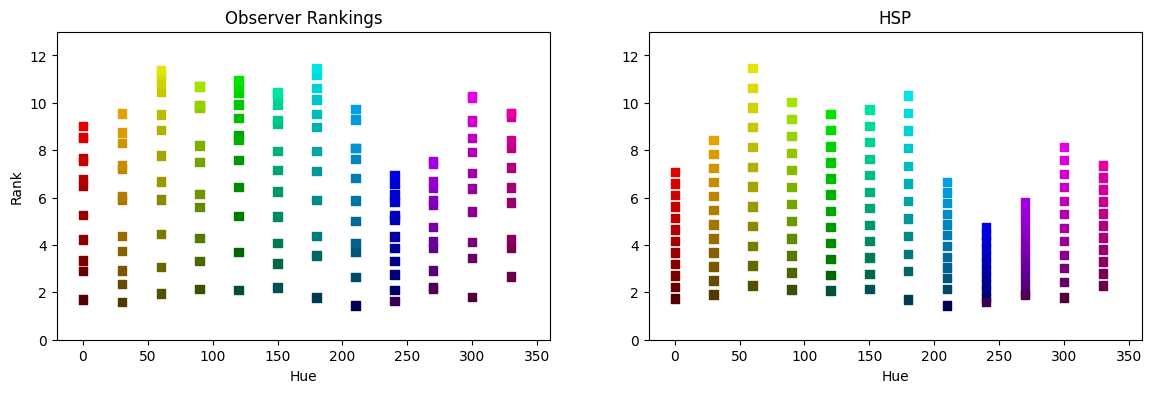

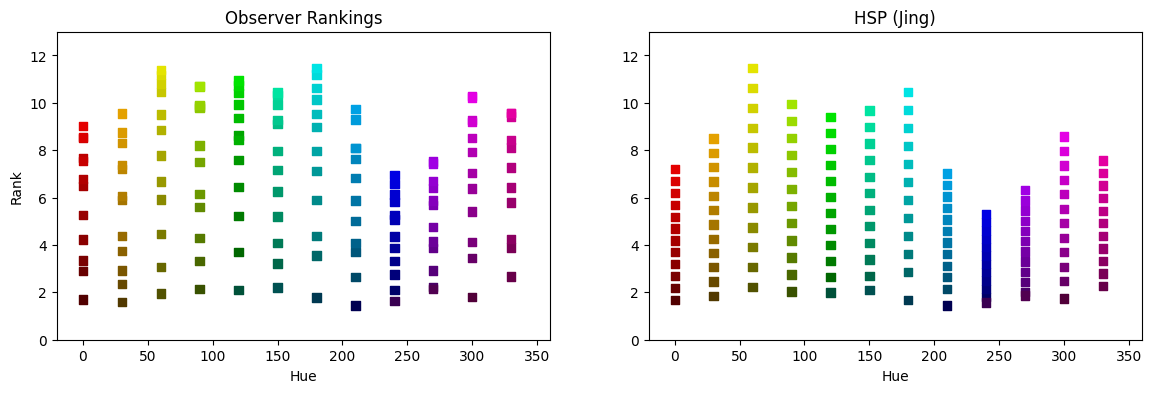

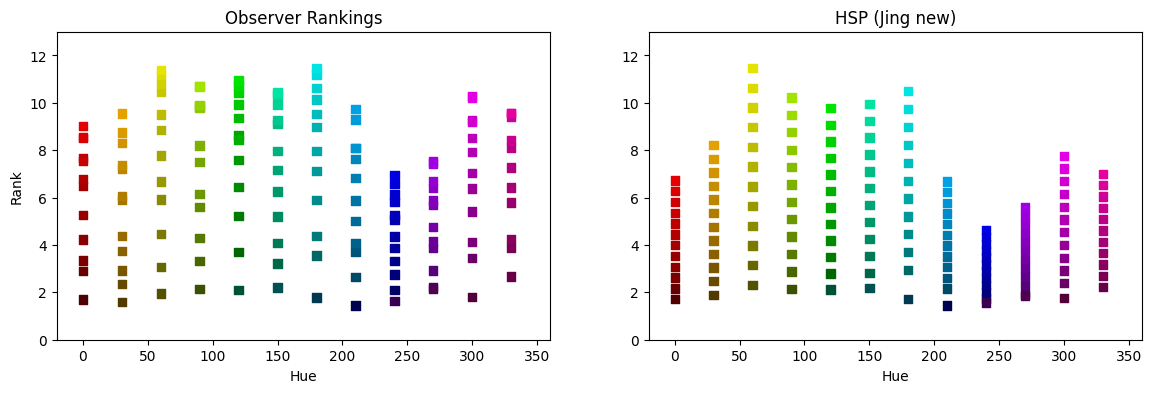

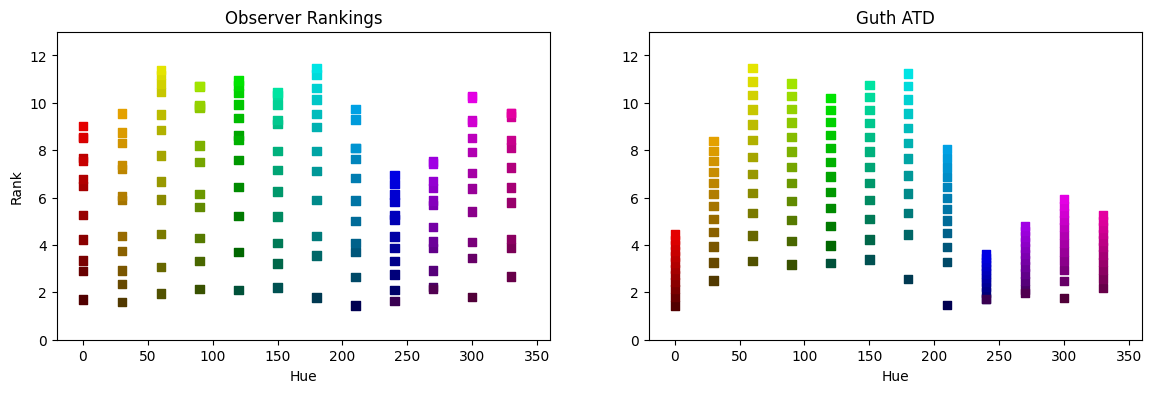

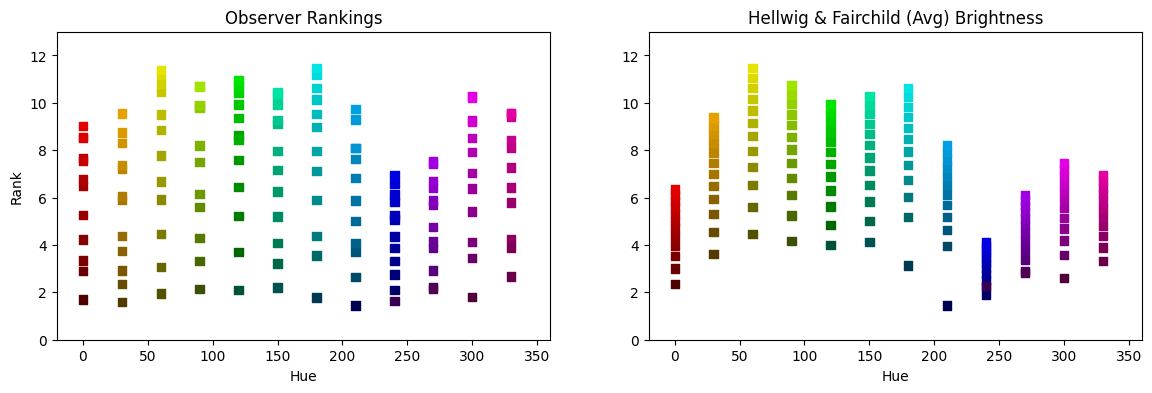

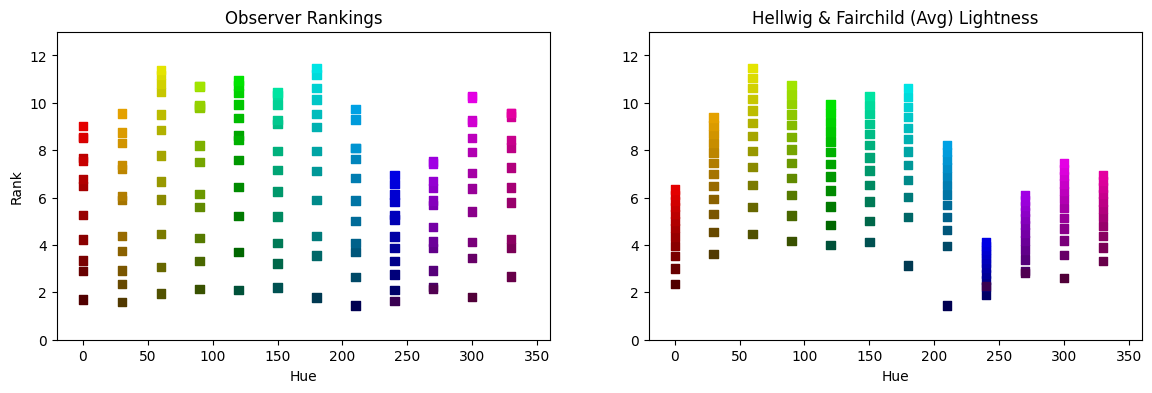

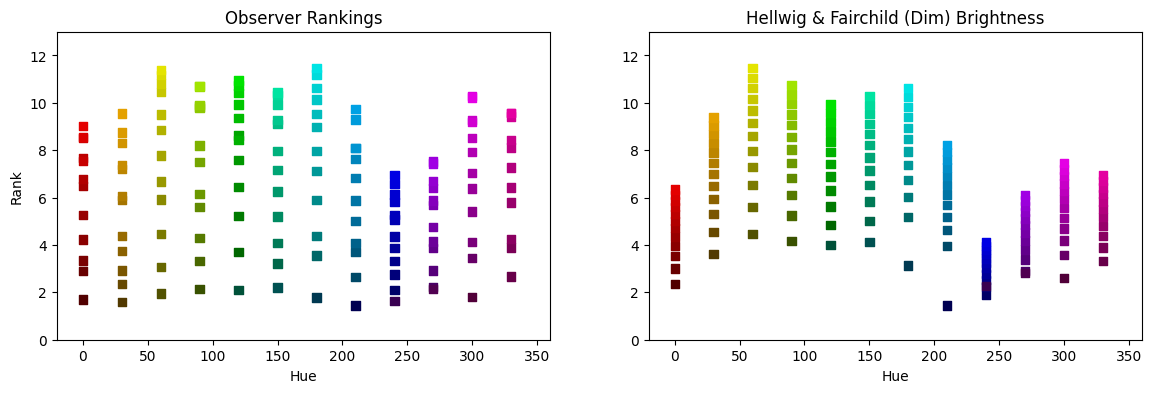

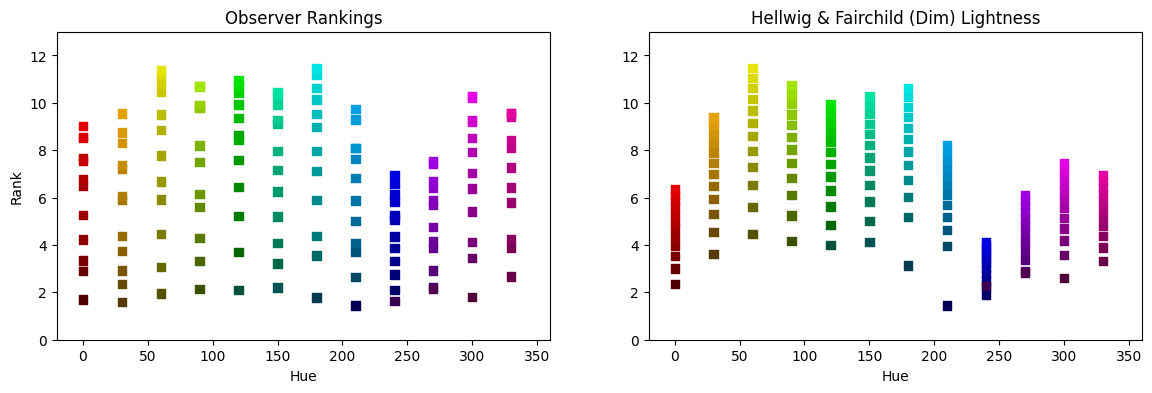

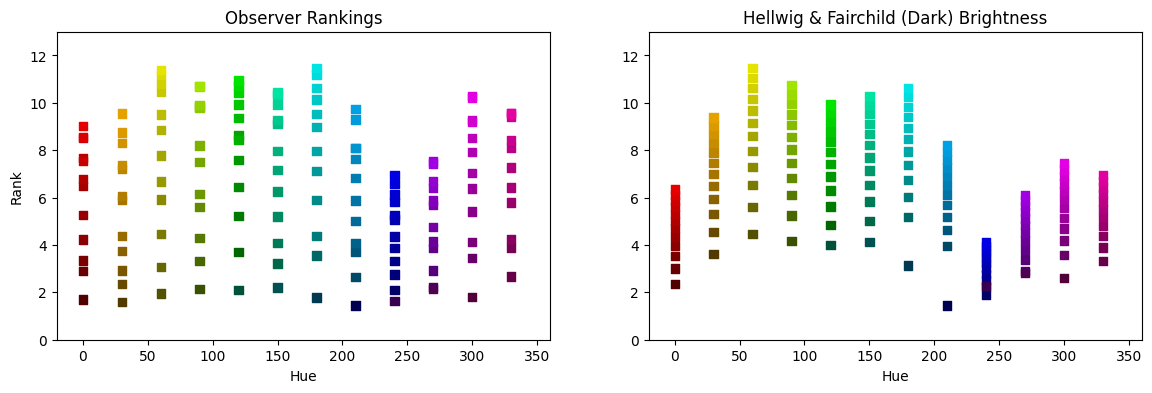

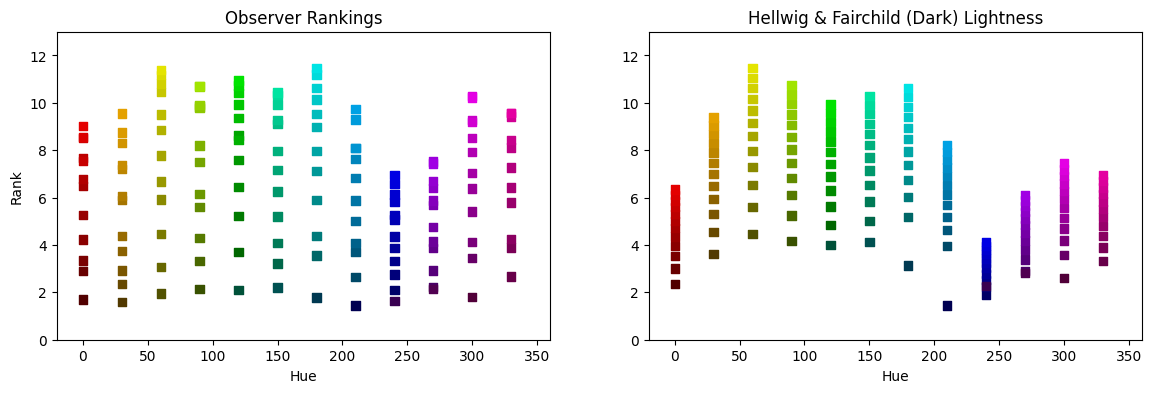

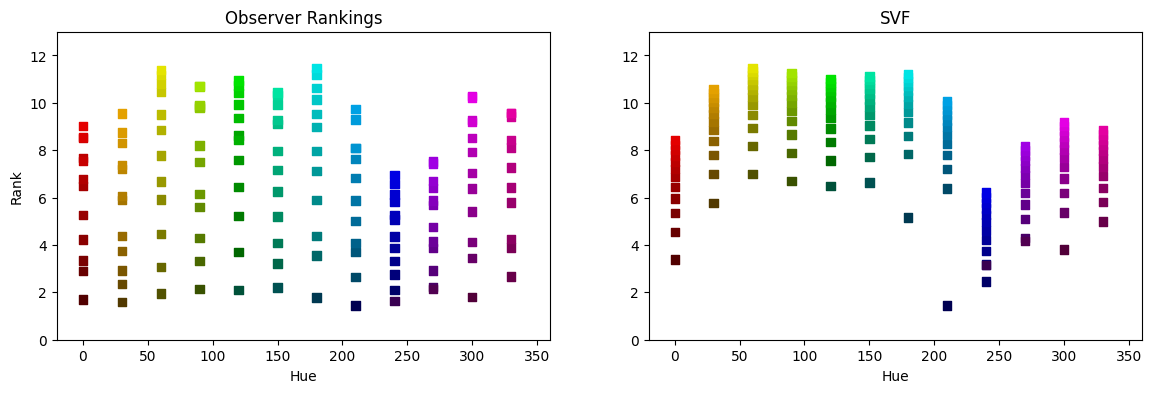

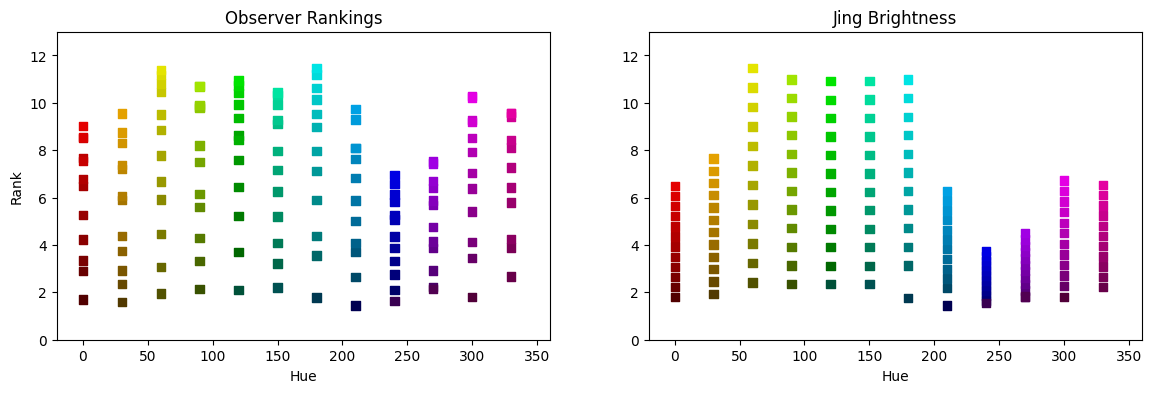

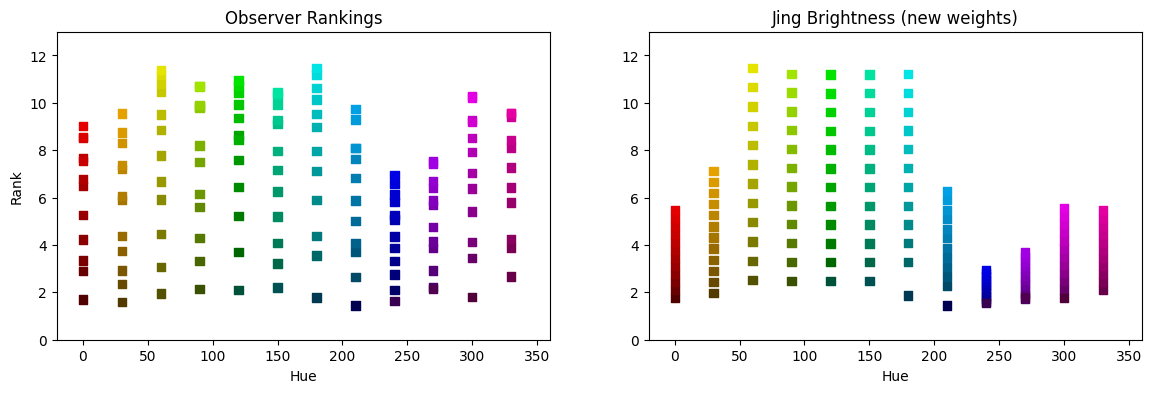

In [51]:
metrics_to_plot = ['maxRGB_Shuchen', 'radiance', 'luminance', 'Lstar', 'Nayatani Br', 'Nayatani Lp', 'Nayatani Ln', 'Hunt_WB Tele', 'Hunt_WB Small', 'Hunt_WB Norm', 'Hunt_Q Tele', 'Hunt_Q Small', 'Hunt_Q Norm', 'CAM16 Dim J', 'HSP', 'HSP_JingWeights', 'HSP_Jing_new', 'ATD', 'Hellwig Avg Q', 'Hellwig Avg J', 'Hellwig Dim Q', 'Hellwig Dim J', 'Hellwig Dark Q', 'Hellwig Dark J', 'SVF', 'JingB', 'JingB_new']
metric_titles = ['Max-weighted RGB', 'Radiance', 'Luminance', 'CIELAB L*', 'Nayatani Brightness', 'Nayatani L*p', 'Nayatani L*n', 'Hunt (Television) Whitness-Blackness', 'Hunt (Small) Whitness-Blackness', 'Hunt (Normal) Whitness-Blackness', 'Hunt (Television) Brightness', 'Hunt (Small) Brightness', 'Hunt (Normal) Brightness', 'CIECAM16 (Dim) J', 'HSP', 'HSP (Jing)', 'HSP (Jing new)', 'Guth ATD', 'Hellwig & Fairchild (Avg) Brightness', 'Hellwig & Fairchild (Avg) Lightness', 'Hellwig & Fairchild (Dim) Brightness', 'Hellwig & Fairchild (Dim) Lightness', 'Hellwig & Fairchild (Dark) Brightness', 'Hellwig & Fairchild (Dark) Lightness', 'SVF', 'Jing Brightness', 'Jing Brightness (new weights)']
mc = 0
for metric in metrics_to_plot:
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    ax[0].scatter(orig_hues[(hues).astype(int)], ranks_all_cubes['ObsRanks'], color=allCubes_plot, marker='s')
    ax[0].set_title('Observer Rankings')
    ax[0].set_ylim([0, 13])
    ax[0].set_xlim([-20, 360])
    ax[0].set_xlabel('Hue')
    ax[0].set_ylabel('Rank')

    ax[1].scatter(orig_hues[(hues).astype(int)], ranks_all_cubes[metric], color=allCubes_plot, marker='s')
    ax[1].set_title(metric_titles[mc])
    ax[1].set_xlabel('Hue')
    ax[1].set_ylim([0, 13])
    ax[1].set_xlim([-20, 360])

    fig.savefig(metric_titles[mc] + '.png', dpi=300)

    mc += 1

In [52]:
for c in range(20):
    plt.close()

plt.close('all')

maxRGB_Shuchen 0.0315349212916
radiance 0.0724987812451
luminance 0.0833620274024
Lstar 0.110195375281
Nayatani Br 0.123352054771
Nayatani Lp 0.123352054771
Nayatani Ln 0.123352054771
Hunt_WB Tele 0.120015276068
Hunt_WB Small nan
Hunt_WB Norm 0.124133815068
Hunt_Q Tele 0.0978522525073
Hunt_Q Small 0.0978522525073
Hunt_Q Norm 0.0978522525073
CAM16 Dim J 0.101069187668
HSP 0.0408088165788
HSP_JingWeights 0.0419118089777
HSP_Jing_new 0.0442193658892
ATD 0.0842637281828
Hellwig Avg Q 0.0933834840413
Hellwig Avg J 0.0933834840413
Hellwig Dim Q 0.0933834840413
Hellwig Dim J 0.0933834840413
Hellwig Dark Q 0.0933834840413
Hellwig Dark J 0.0933834840413
SVF 0.179826593643
JingB 0.0505661121153


/tmp/ipykernel_43648/4073695465.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2, figsize=(12, 4))


JingB_new 0.0703926202095


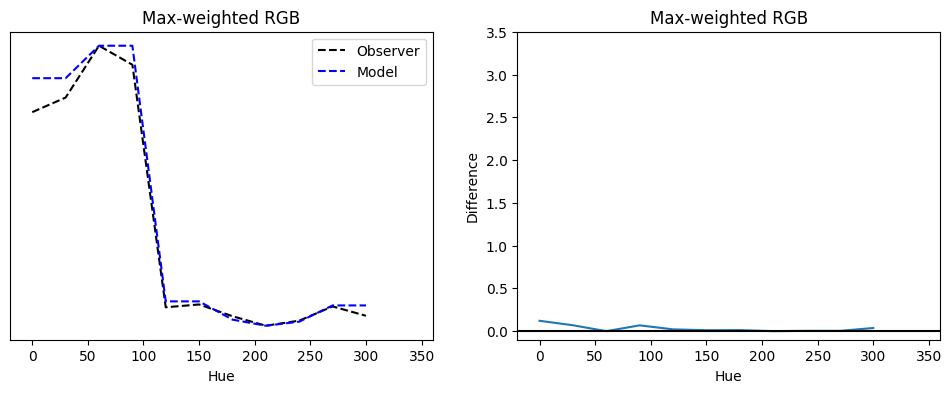

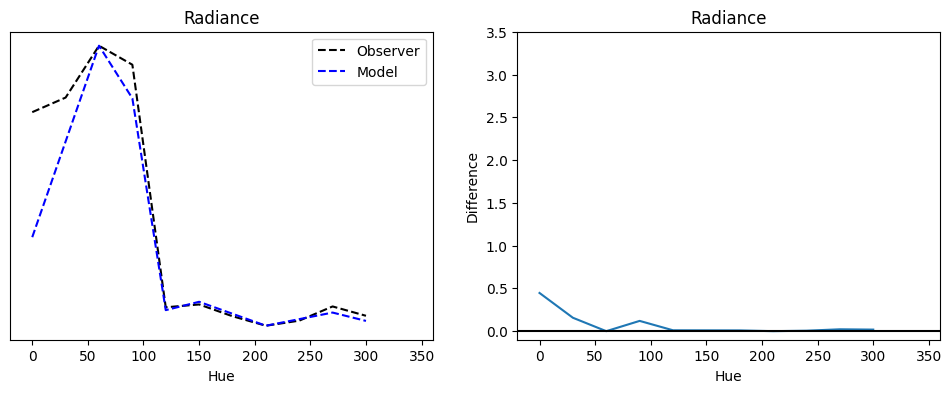

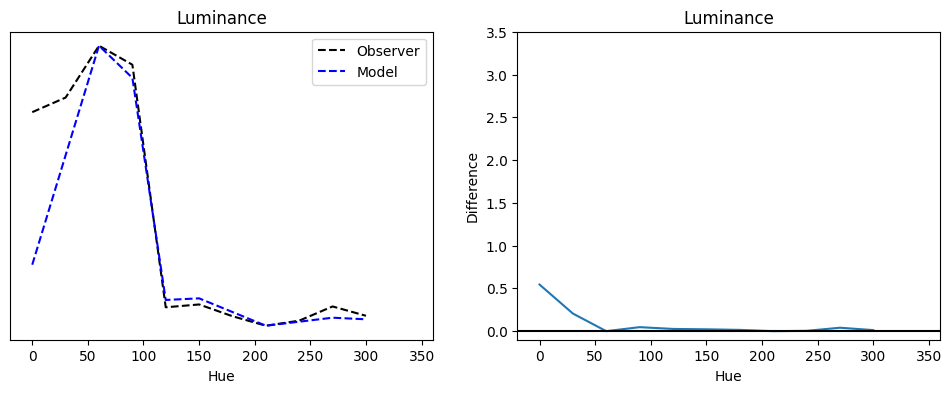

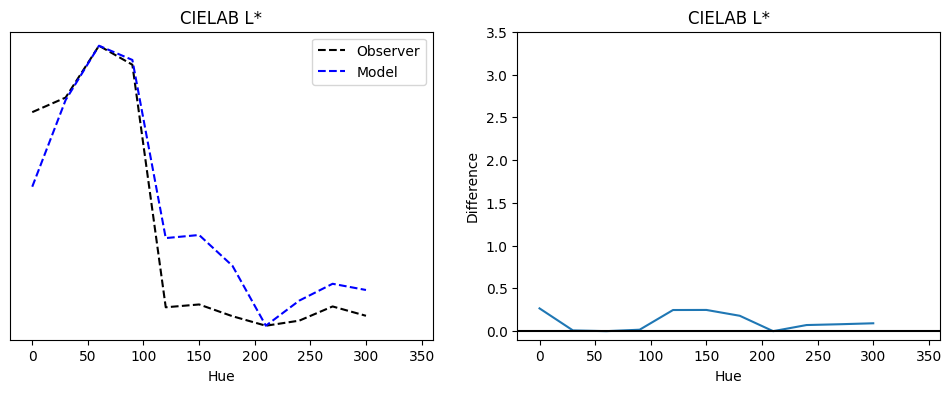

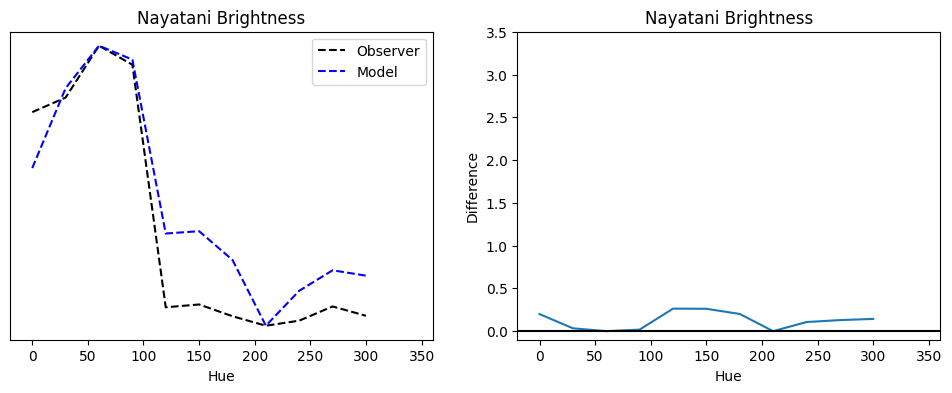

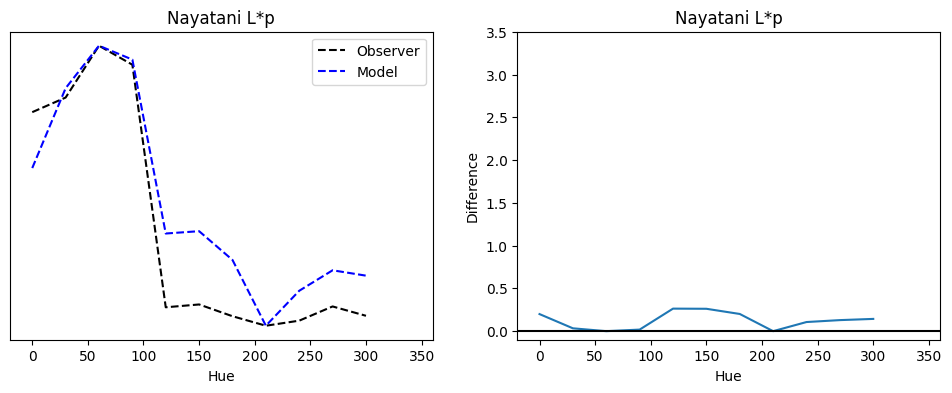

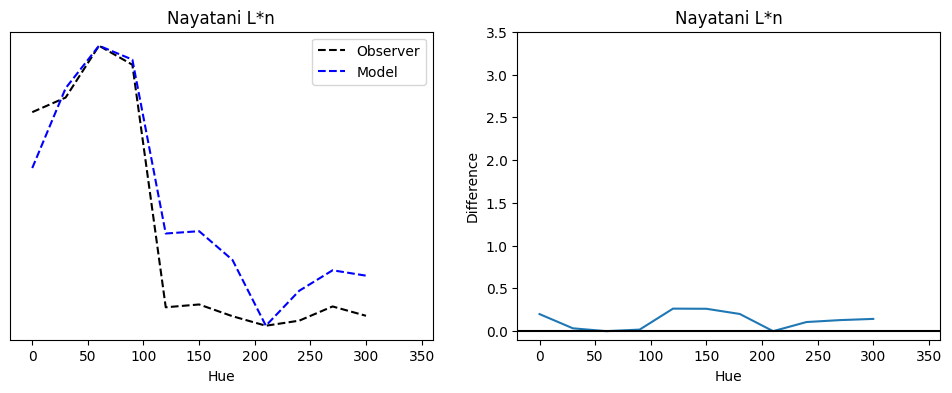

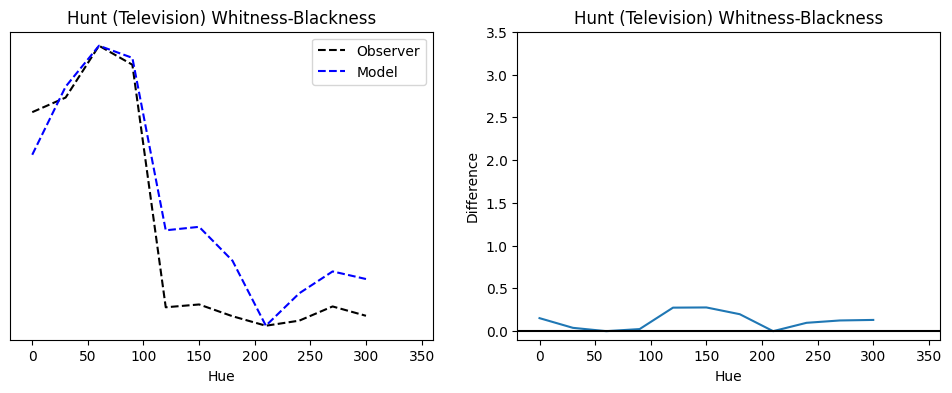

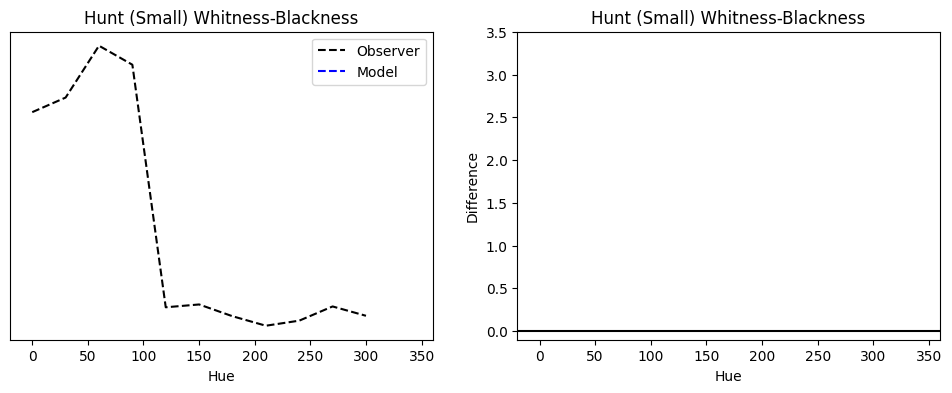

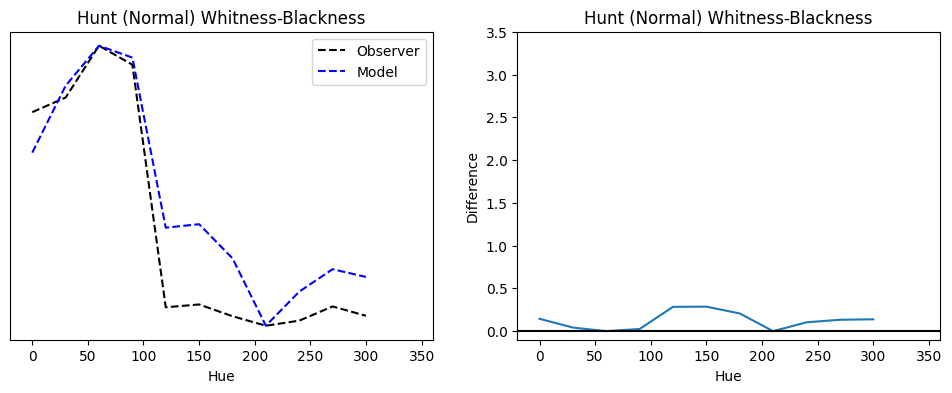

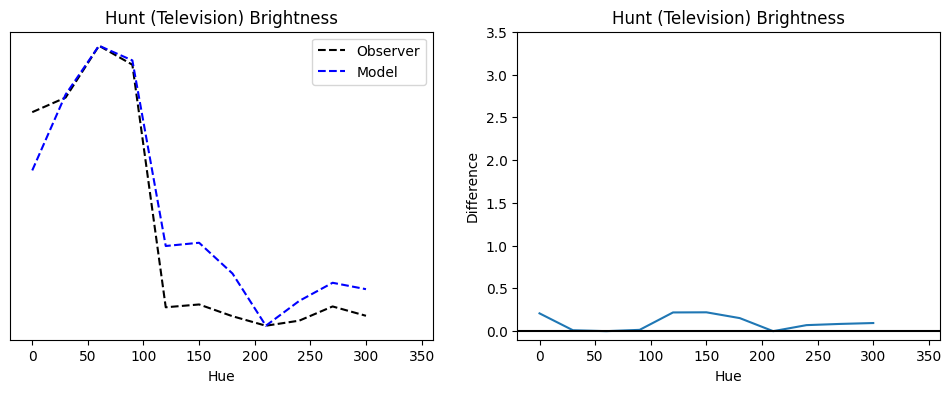

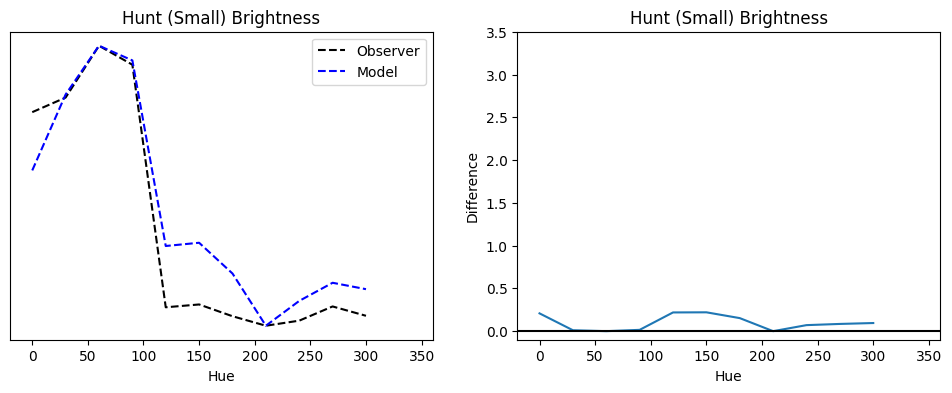

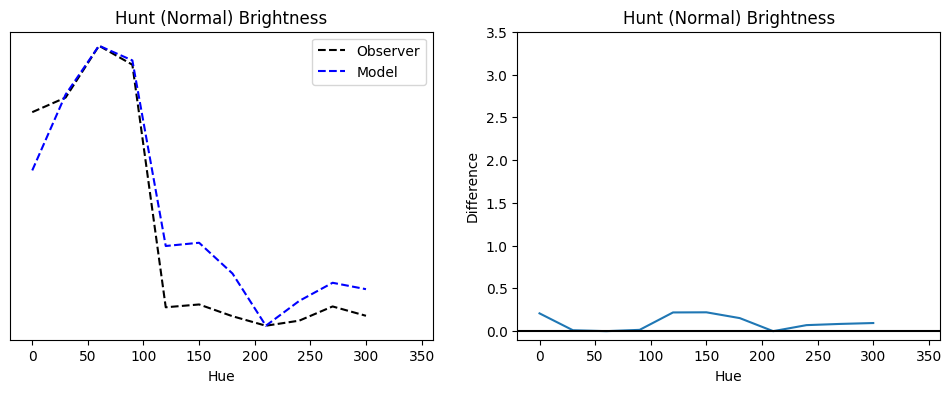

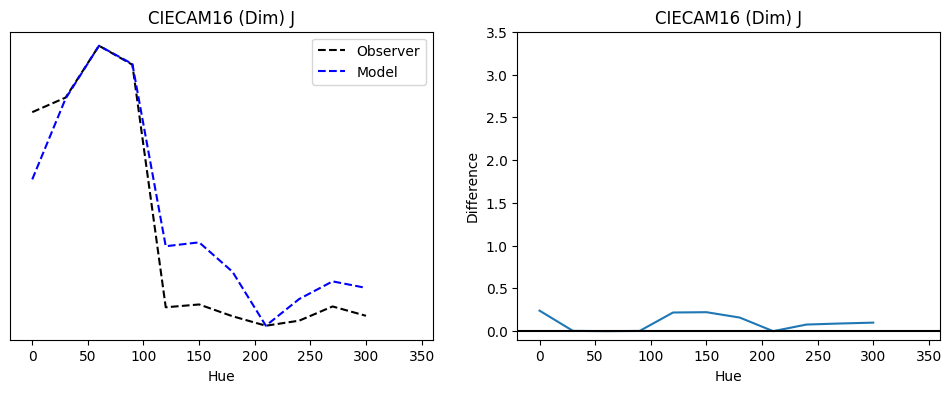

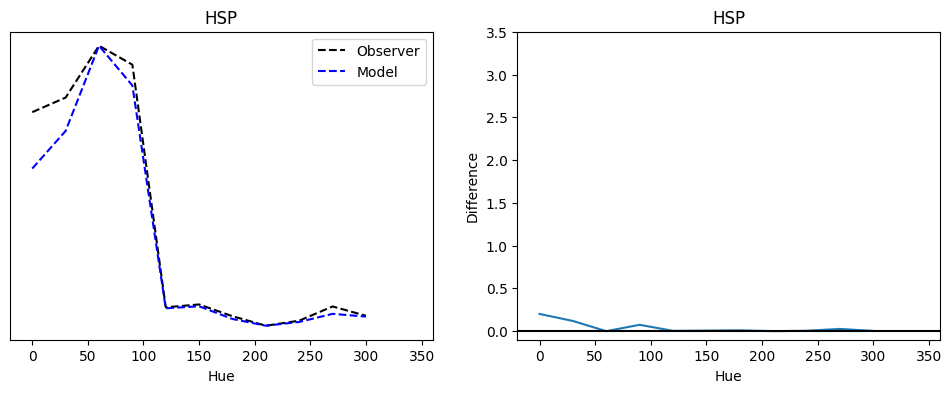

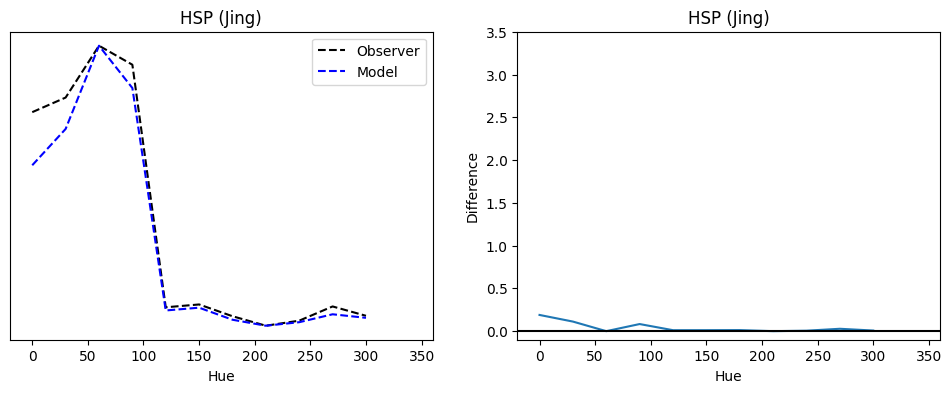

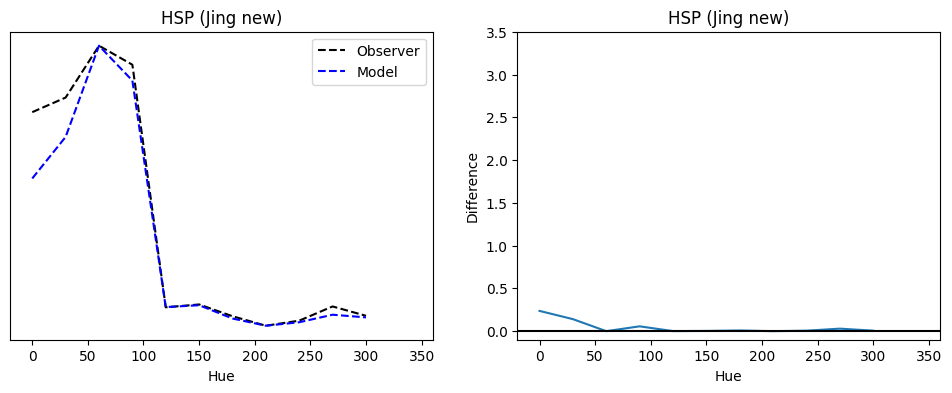

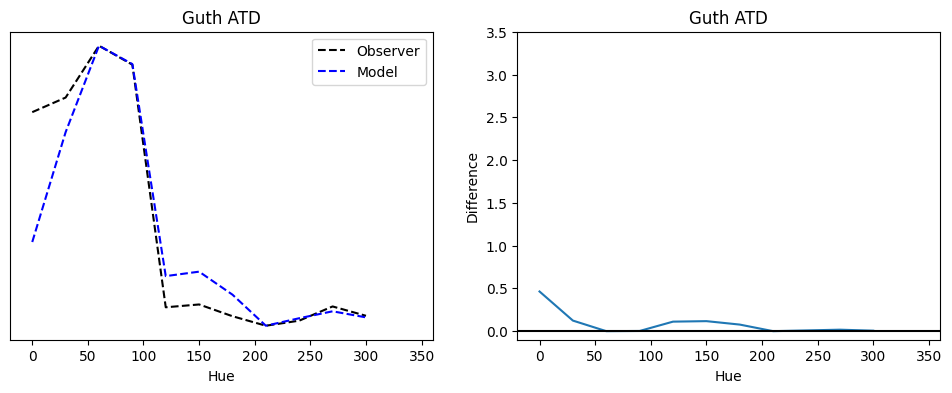

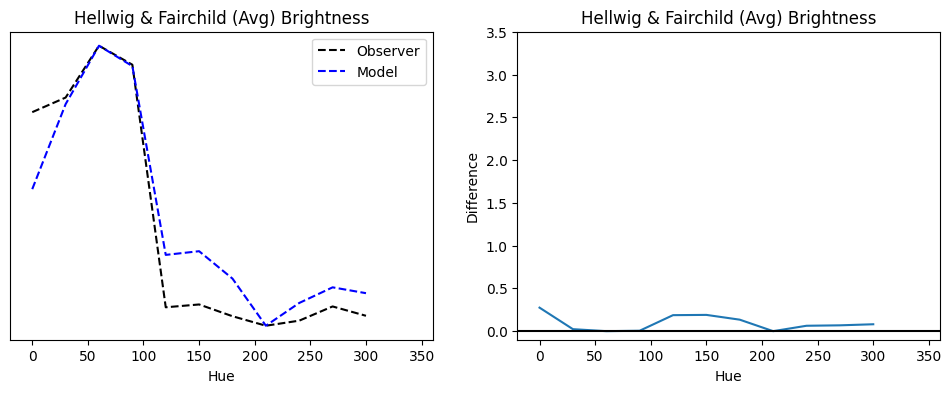

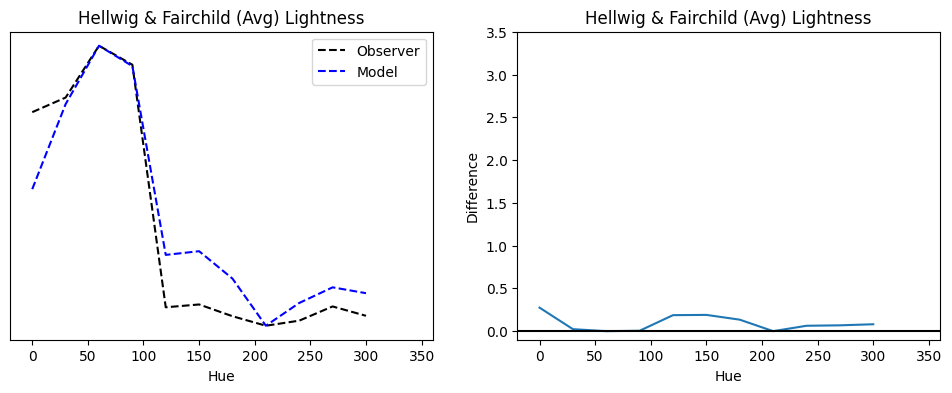

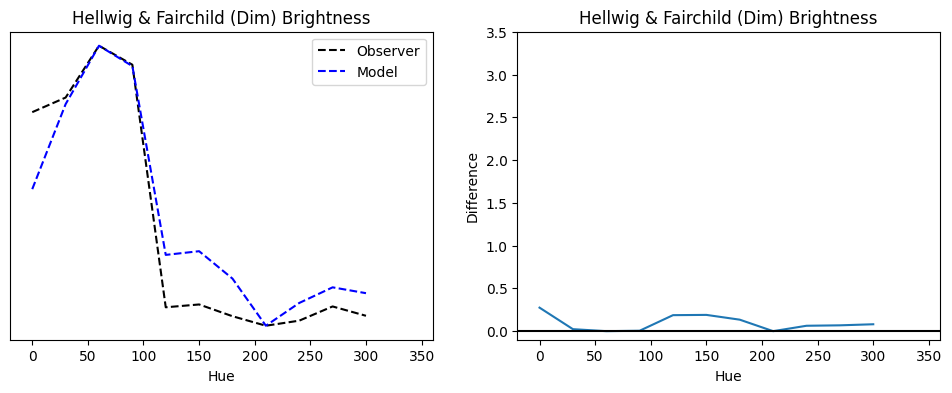

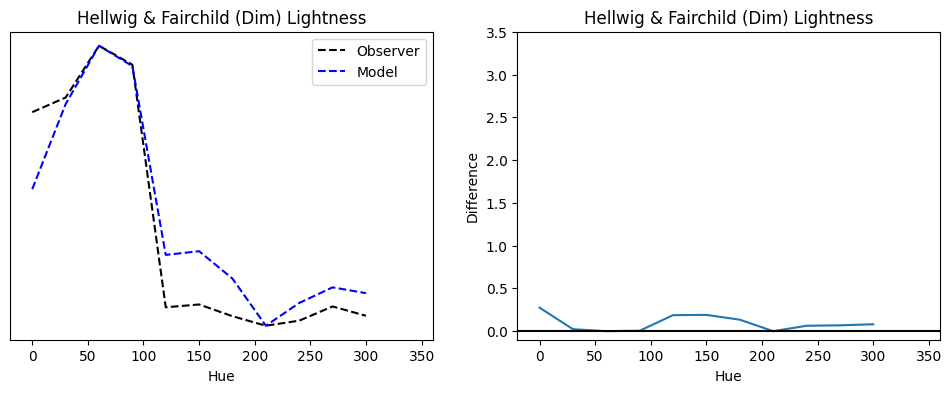

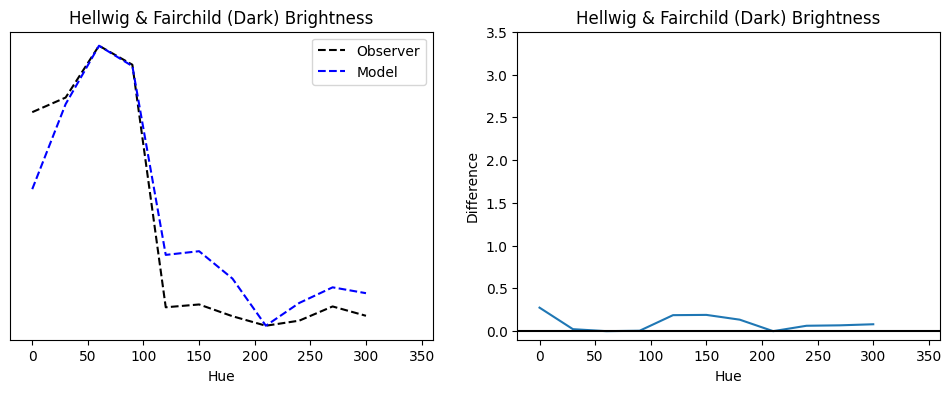

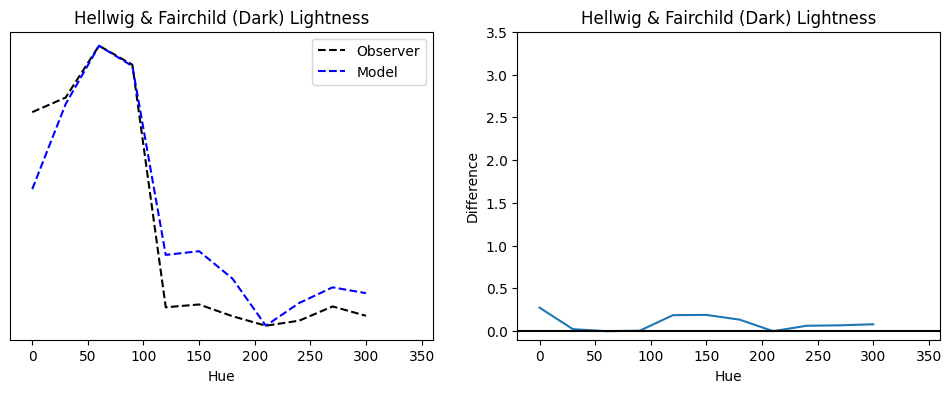

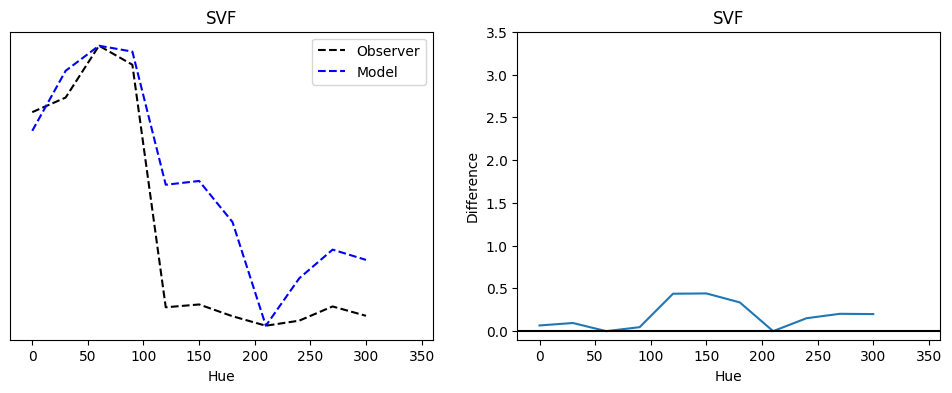

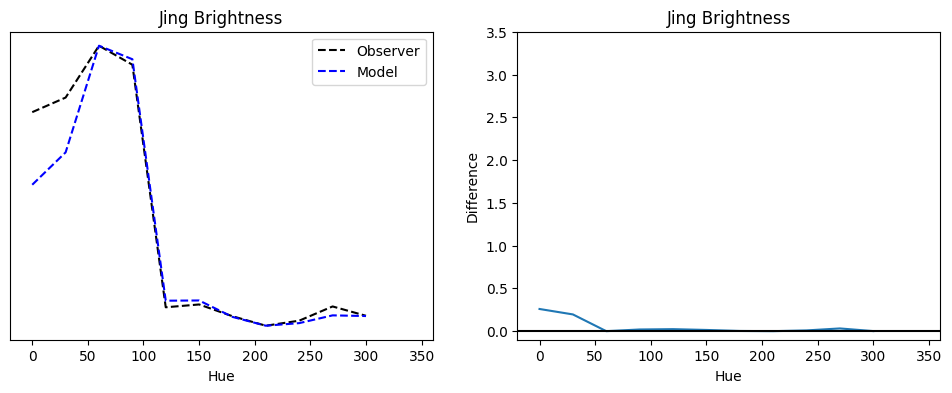

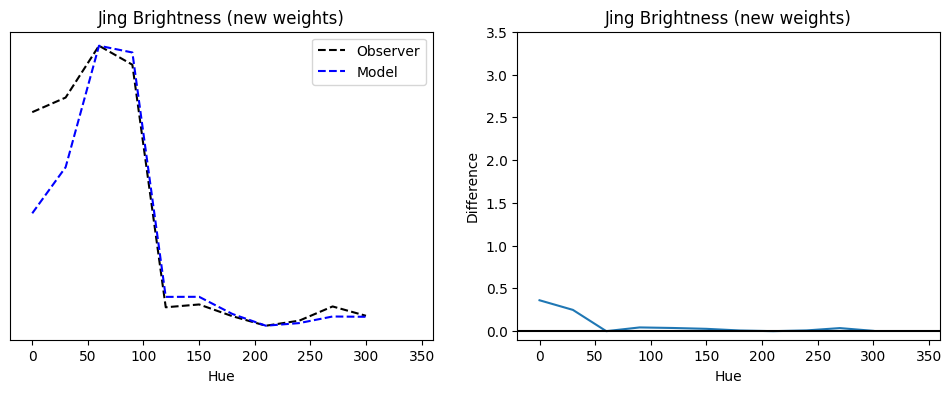

In [53]:
mc = 0
for metric in metrics_to_plot:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    obs_ranks = ranks_all_cubes['ObsRanks'][11::12]
    metric_ranks = ranks_all_cubes[metric][11::12]

    obs_ranks = obs_ranks - np.mean(obs_ranks)
    metric_ranks = metric_ranks - np.mean(metric_ranks)

    obs_ranks = obs_ranks - np.min(obs_ranks)
    metric_ranks = metric_ranks - np.min(metric_ranks)

    obs_ranks = obs_ranks/np.max(obs_ranks)
    metric_ranks = metric_ranks/np.max(metric_ranks)

    rank_diff = np.abs(obs_ranks - metric_ranks)
    print(metric, np.mean(rank_diff))

    oranks = obs_ranks.flatten()
    mranks = metric_ranks.flatten()

    ax[0].plot(orig_hues[(hues[11::12]).astype(int)], oranks, color="black", linestyle="dashed", label="Observer")
    # ax[0].scatter(orig_hues[(hues[11::12]).astype(int)], oranks, marker='s', color=allCubes_plot[11::12, :])
    ax[0].set_title('Observer Rankings')
    ax[0].set_xlabel('Hue')
    # ax[0].set_ylabel('Rank')
    # ax[0].set_ylim([0, 13])
    ax[0].set_xlim([-20, 360])
    ax[0].set_yticks([])

    ax[0].plot(orig_hues[(hues[11::12]).astype(int)], metric_ranks, color="blue", linestyle="dashed", label="Model")
    # ax[0].scatter(orig_hues[(hues[11::12]).astype(int)], metric_ranks, marker='d', edgecolors="black", color=allCubes_plot[11::12, :])
    ax[0].set_title(metric_titles[mc])
    ax[0].set_xlabel('Hue')
    # ax[0].set_ylabel('Rank')
    # ax[0].set_ylim([0, 13])
    ax[0].set_xlim([-20, 360])
    ax[0].set_yticks([])

    ax[0].legend()

    ax[1].plot(orig_hues[(hues[11::12]).astype(int)], rank_diff)
    ax[1].plot([-20, 360], [0, 0], color="black")
    ax[1].set_title(metric_titles[mc])
    ax[1].set_xlabel('Hue')
    ax[1].set_ylabel('Difference')
    ax[1].set_xlim([-20, 360])
    ax[1].set_ylim([-0.1, 3.5])

    mc += 1

In [54]:
actual_ranks = {}
ranked_hues = {}
ranked_rgbs = {}
for metric in ranks_all_cubes:
    actual_ranks[metric] = np.zeros((ncs))
    if metric == 'ObsRanks':
        ranked_hues[metric] = hues
        actual_ranks[metric] = ranks_all_cubes[metric]
        ranked_rgbs[metric] = allCubes_plot
        continue

    bvals = ranks_all_cubes[metric]

    ranked_inds = np.argsort(bvals)

    ranked_hues[metric] = hues[ranked_inds]
    actual_ranks[metric] = ranked_inds
    ranked_rgbs[metric] = allCubes_plot[ranked_inds, :]

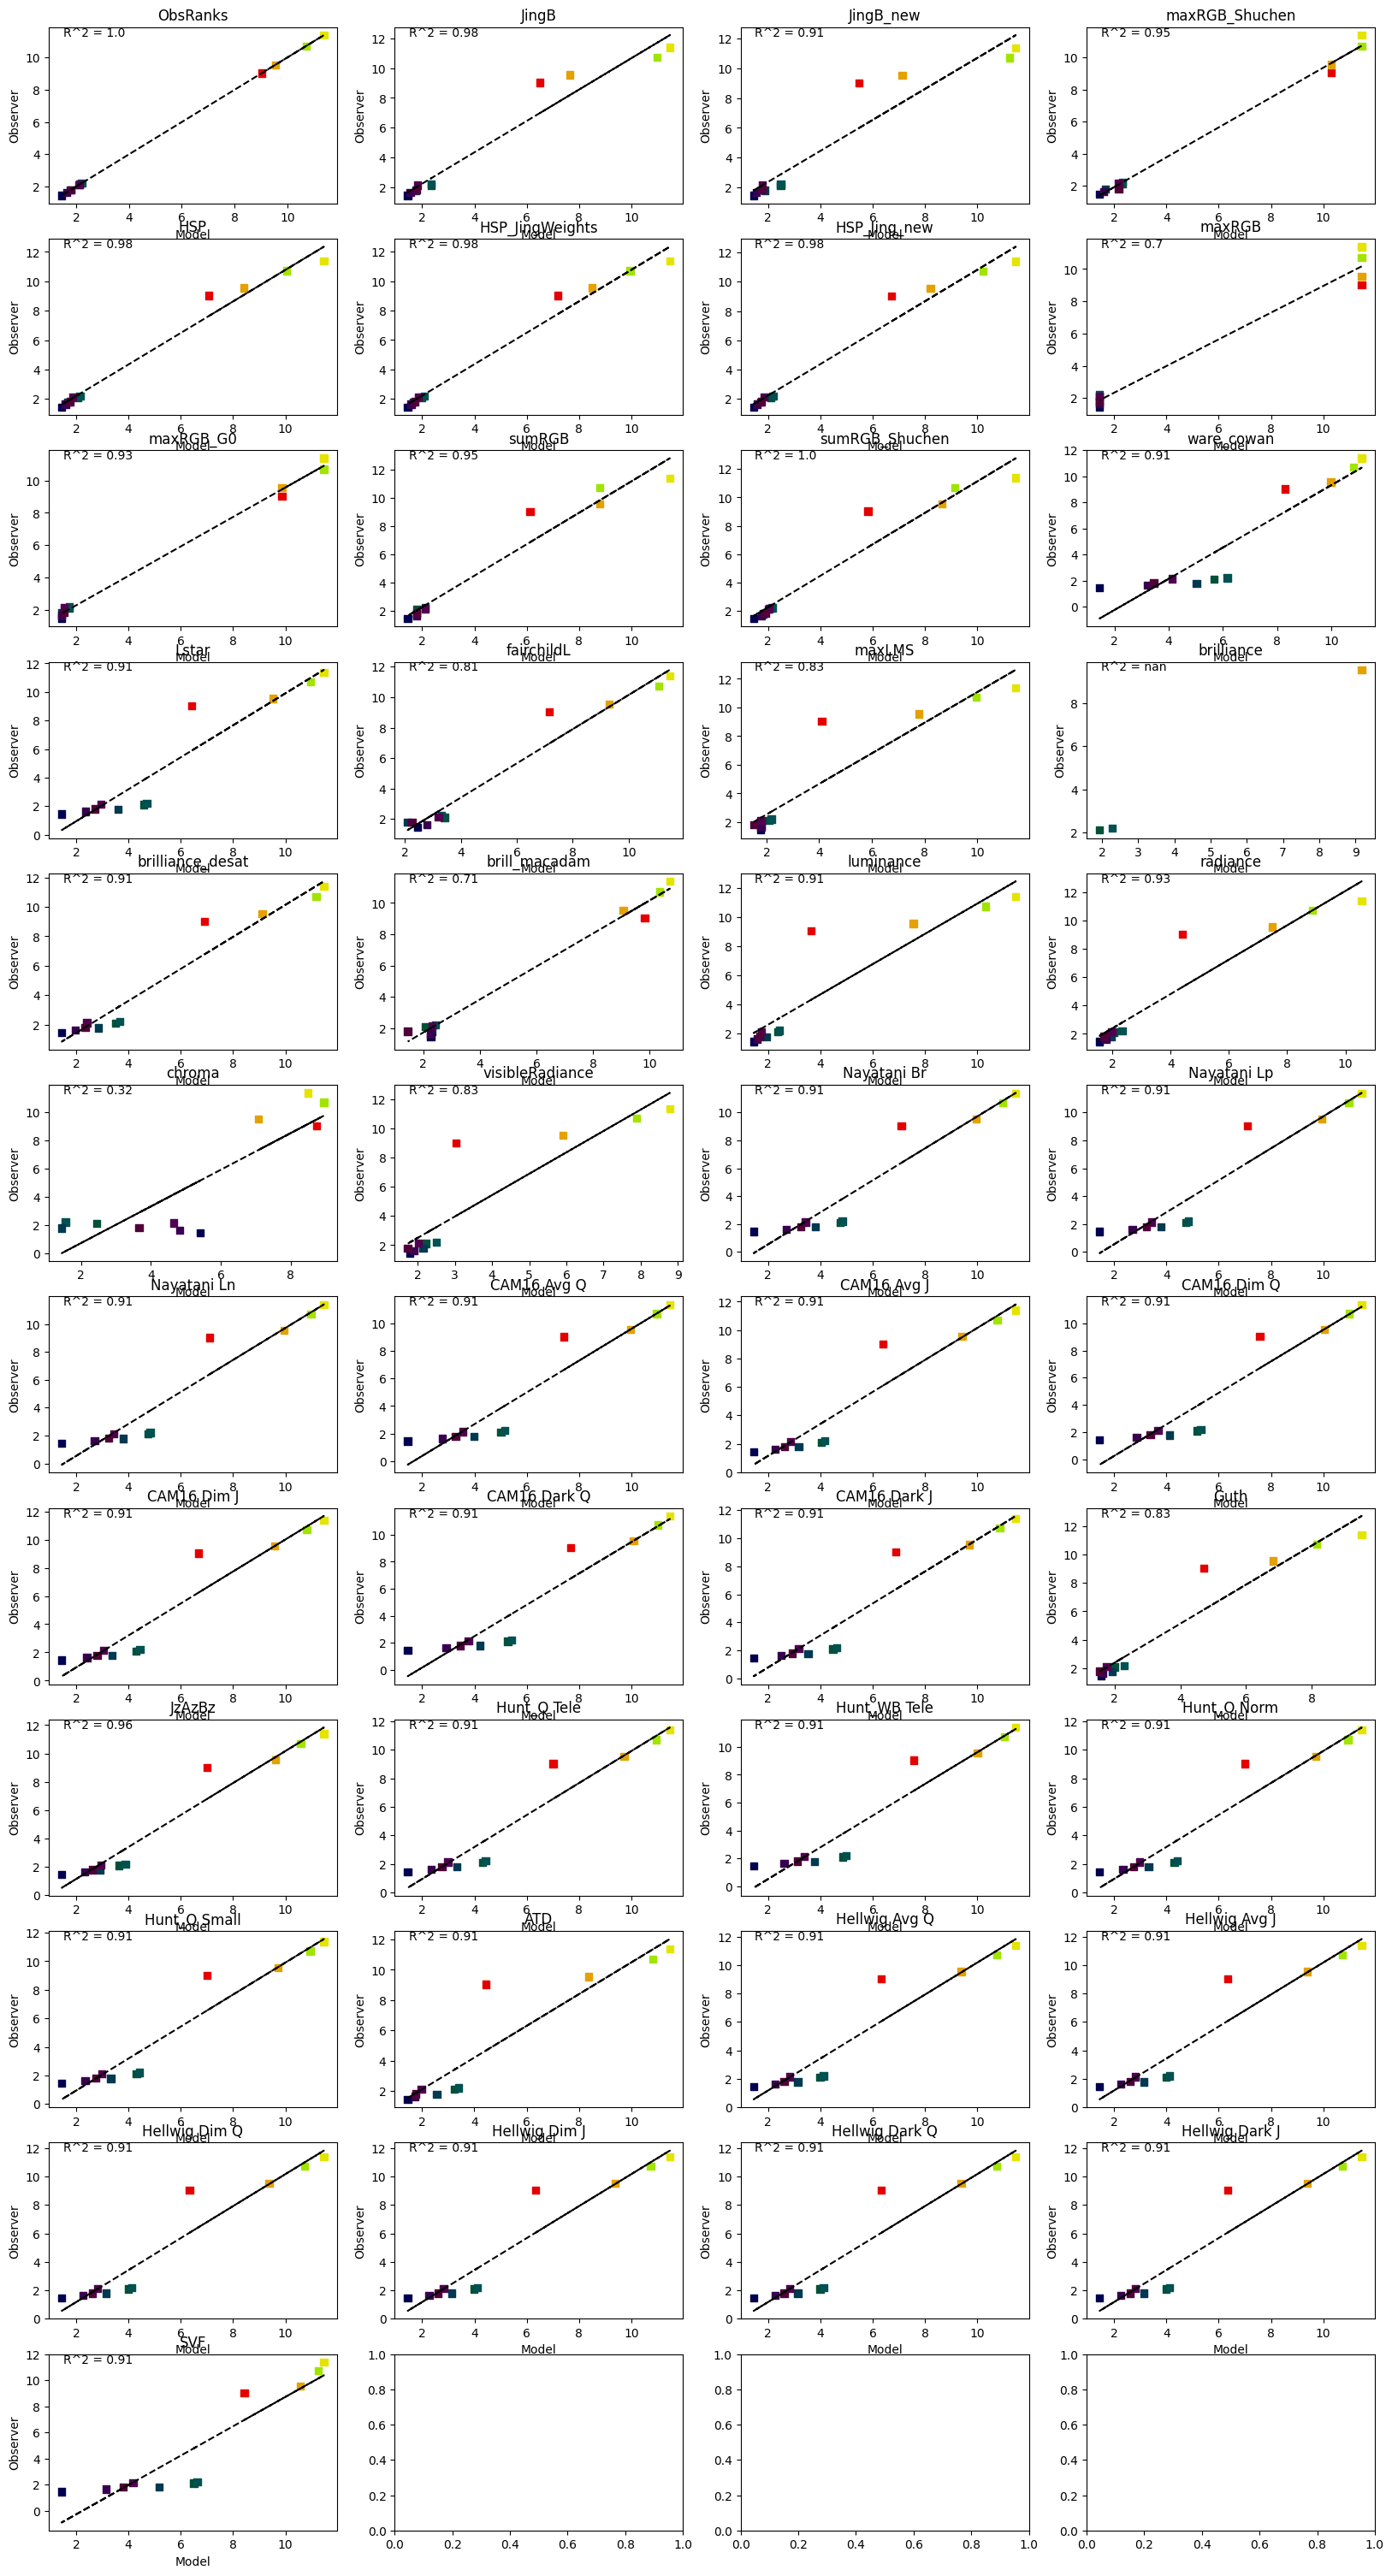

In [55]:
from scipy.stats import spearmanr

model_corrs = {}
c = 0
fig, ax = plt.subplots(12, 4, figsize=(20, 38))
ax = ax.flatten()
for metric in ranks_all_cubes:
    if metric == 'Hunt_WB Norm' or metric == 'Hunt_WB Small':
        continue

    obs_ranks = ranks_all_cubes['ObsRanks'][11::12]
    metric_ranks = ranks_all_cubes[metric][11::12]

    oranks = obs_ranks.flatten()
    mranks = metric_ranks.flatten()

    # ccs = np.corrcoef(oranks, mranks)
    # model_corrs[metric] = ccs[0, 1]

    ccs = spearmanr(oranks, mranks)
    model_corrs[metric] = ccs.statistic

    ax[c].scatter(mranks, oranks, marker='s', color=allCubes_plot[11::12, :])
    ax[c].set_title(metric)
    ax[c].set_xlabel('Model')
    ax[c].set_ylabel('Observer')

    # ax[c].text(0.05, 0.95, 'R^2 = ' + str(np.round(np.power(ccs[0, 1], 2), 2)), transform=ax[c].transAxes)
    ax[c].text(0.05, 0.95, 'R^2 = ' + str(np.round(np.power(ccs.statistic, 2), 2)), transform=ax[c].transAxes)

    if metric != 'brilliance':
        a, b = np.polyfit(metric_ranks, obs_ranks, 1)
        ax[c].plot(metric_ranks, a*metric_ranks + b, 'k--')

    c += 1

<BarContainer object of 45 artists>

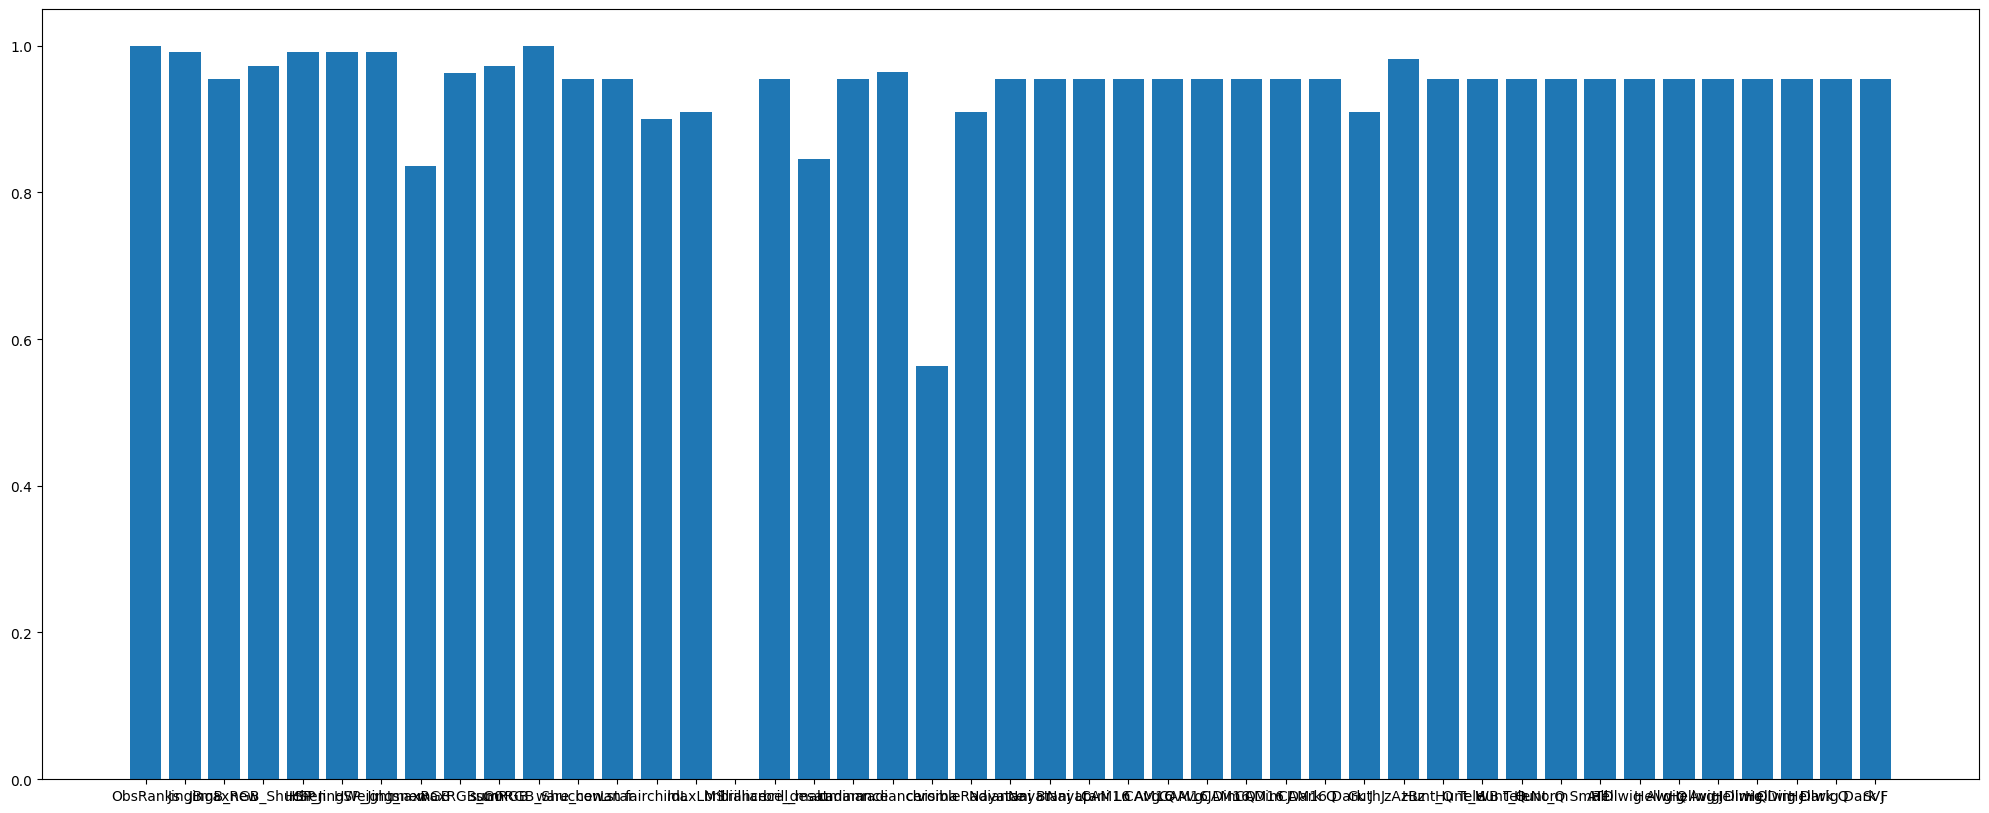

In [56]:
fig, ax = plt.subplots(figsize=(25, 10))
metrics, corrs = zip(*model_corrs.items())
ax.bar(metrics, corrs)

In [57]:
acc = {}
for metric in ranks_all_cubes:
    acc[metric] = robsblobs.brightness_ranking.accuracyShuchen(ranks_all_cubes[metric], ranks_all_cubes['ObsRanks'])

acc

{'ObsRanks': 1.0,
 'JingB': 0.90552105237419922,
 'JingB_new': 0.86688835639884587,
 'maxRGB_Shuchen': 0.90845518118245394,
 'HSP': 0.94092620666047244,
 'HSP_JingWeights': 0.94581642134089683,
 'HSP_Jing_new': 0.93554697051200553,
 'maxRGB': 0.86077558804831533,
 'maxRGB_G0': 0.91168272287153407,
 'sumRGB': 0.86943126803266668,
 'sumRGB_Shuchen': 0.89588732945376304,
 'ware_cowan': 0.86493227052667609,
 'Lstar': 0.83343928798474254,
 'fairchildL': 0.89534940583891631,
 'maxLMS': 0.8623893588928554,
 'brilliance': 0.53332681304709273,
 'brilliance_desat': 0.87011589808792611,
 'brill_macadam': 0.85925962149738377,
 'luminance': 0.83343928798474254,
 'radiance': 0.88957895251601549,
 'chroma': 0.65093647611130123,
 'visibleRadiance': 0.84830554061323293,
 'Nayatani Br': 0.8397965670692944,
 'Nayatani Lp': 0.8397965670692944,
 'Nayatani Ln': 0.8397965670692944,
 'CAM16 Avg Q': 0.84713188908993109,
 'CAM16 Avg J': 0.84713188908993109,
 'CAM16 Dim Q': 0.84713188908993109,
 'CAM16 Dim J': 0

Text(0, 0.5, 'Accuracy')

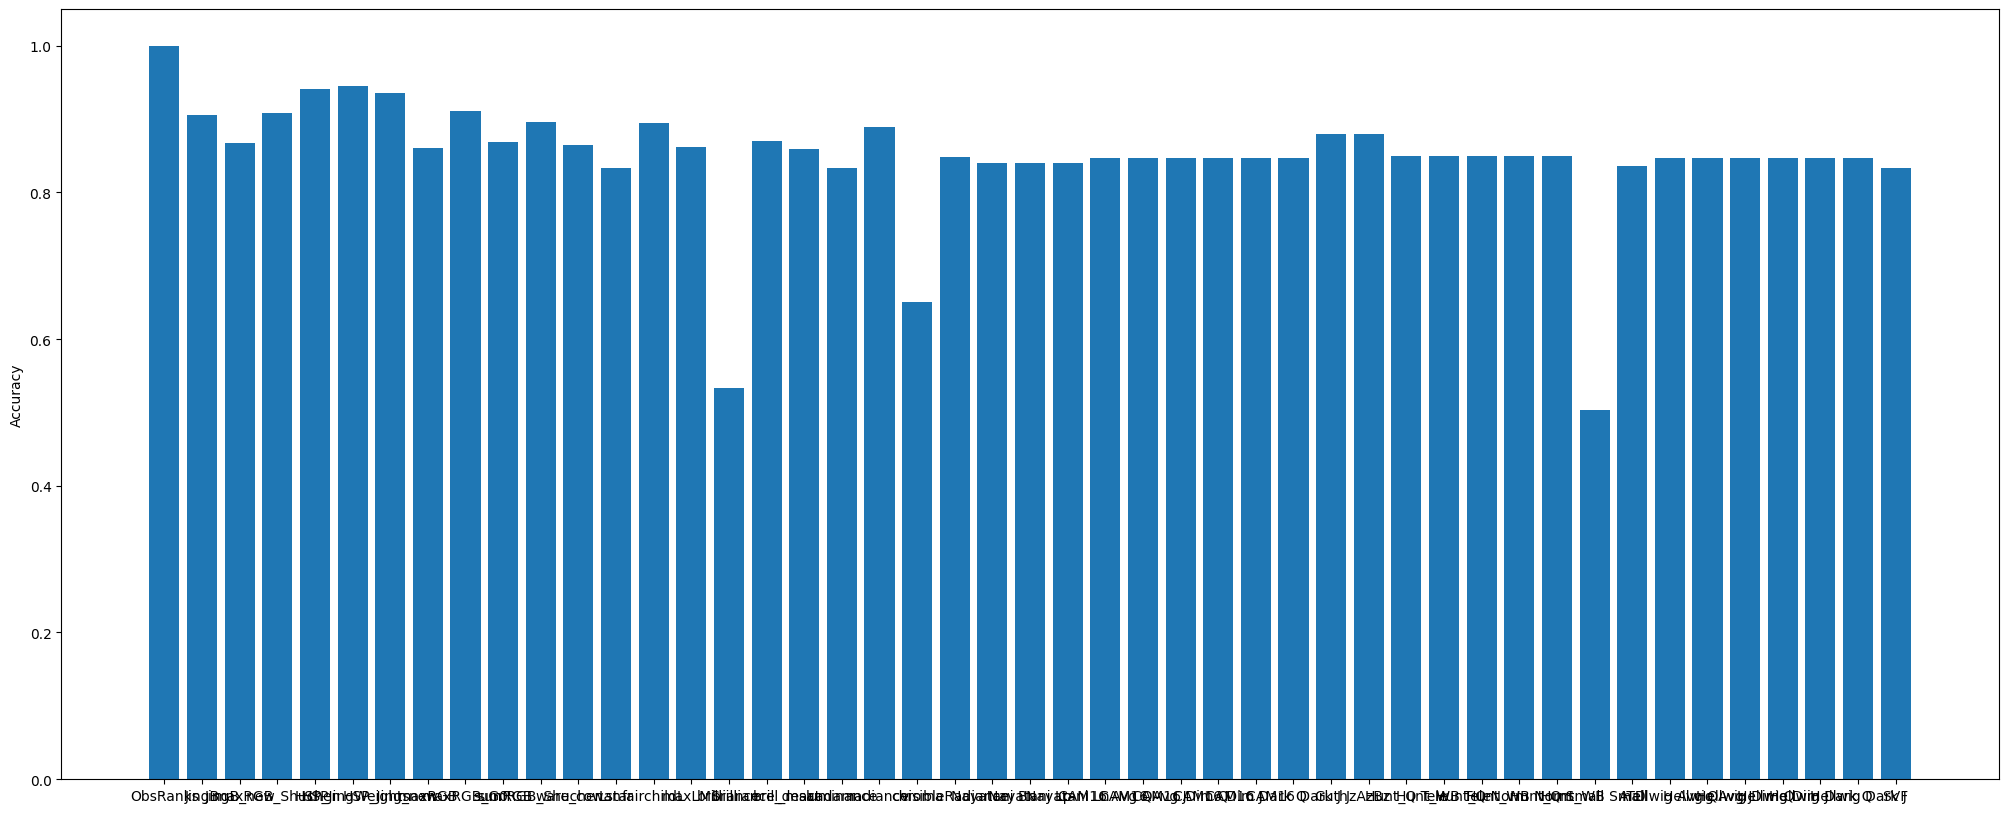

In [58]:
fig, ax = plt.subplots(figsize=(25, 10))
metrics, corrs = zip(*acc.items())
ax.bar(metrics, corrs)
ax.set_ylabel('Accuracy')

<BarContainer object of 47 artists>

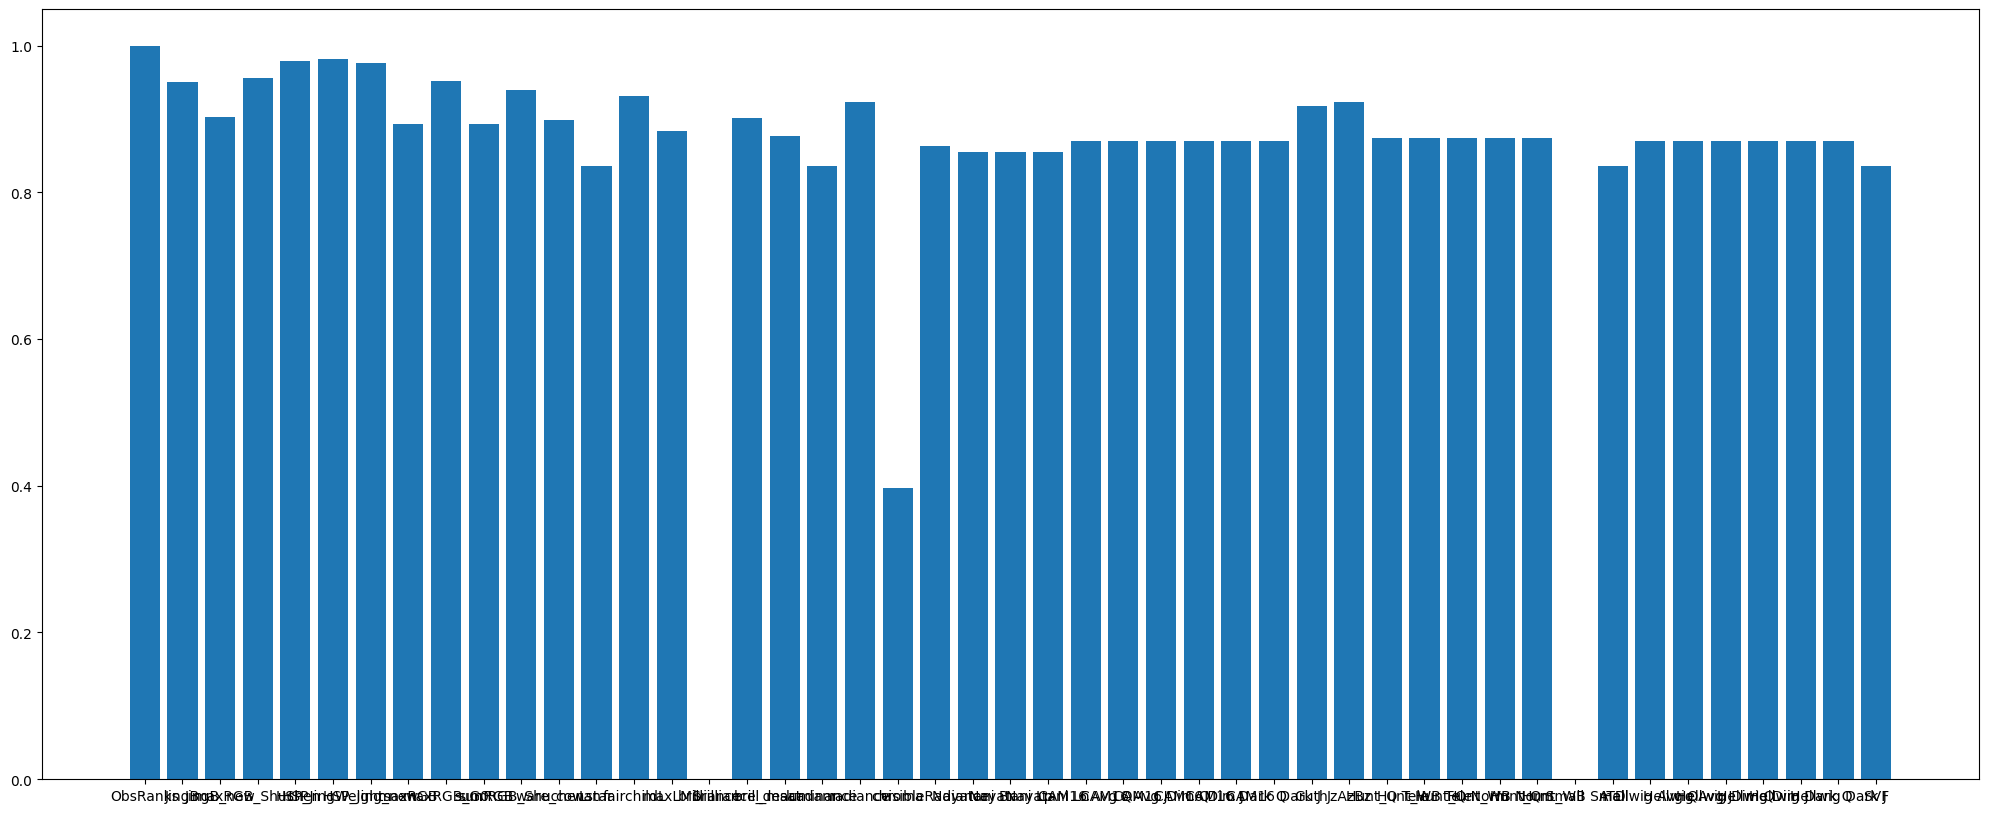

In [59]:
from scipy.stats import spearmanr

model_corrs = {}
c = 0
for metric in ranks_all_cubes:
    obs_ranks = ranks_all_cubes['ObsRanks']
    metric_ranks = ranks_all_cubes[metric]

    oranks = obs_ranks.flatten()
    mranks = metric_ranks.flatten()

    # ccs = np.corrcoef(oranks, mranks)
    # model_corrs[metric] = ccs[0, 1]

    ccs = spearmanr(oranks, mranks)
    model_corrs[metric] = ccs.statistic

fig, ax = plt.subplots(figsize=(25, 10))
metrics, corrs = zip(*model_corrs.items())
ax.bar(metrics, corrs)

In [60]:
model_corrs

{'ObsRanks': 0.99999999999999978,
 'JingB': 0.95075757575757558,
 'JingB_new': 0.90236875800256089,
 'maxRGB_Shuchen': 0.95563102318368687,
 'HSP': 0.97966118388653589,
 'HSP_JingWeights': 0.98266522210184182,
 'HSP_Jing_new': 0.97671870383137971,
 'maxRGB': 0.89331365914771732,
 'maxRGB_G0': 0.95207595007254331,
 'sumRGB': 0.89365270173032552,
 'sumRGB_Shuchen': 0.93935591631003801,
 'ware_cowan': 0.89869989165763808,
 'Lstar': 0.8362511901244295,
 'fairchildL': 0.93202747956269083,
 'maxLMS': 0.88365097343970578,
 'brilliance': nan,
 'brilliance_desat': 0.90161364457139104,
 'brill_macadam': 0.87690830296464084,
 'luminance': 0.8362511901244295,
 'radiance': 0.92355707672609078,
 'chroma': 0.39702550970156603,
 'visibleRadiance': 0.86286073081847725,
 'Nayatani Br': 0.8556625299583045,
 'Nayatani Lp': 0.8556625299583045,
 'Nayatani Ln': 0.8556625299583045,
 'CAM16 Avg Q': 0.86992760760366394,
 'CAM16 Avg J': 0.86992760760366394,
 'CAM16 Dim Q': 0.86992760760366394,
 'CAM16 Dim J': 0.

In [61]:
data = sio.loadmat('corrTrials_60.mat')
colorList = data['corrTrials_60']

ranks = {}
hues = np.zeros((colorList.shape[0], colorList.shape[1]))
vs = np.zeros((colorList.shape[0], colorList.shape[1]))
for tc in range(len(colorList)):
    rgbs = colorList[tc, :, :].squeeze()

    for c in range(len(rgbs)):
        rgb_gc = rgbs[c, :].squeeze()
        rgb_lin = np.power(rgb_gc/255, np.array([2.1452, 2.1489, 2.0831]))
        hsv = robsblobs.hsv.rgb2hsv(rgb_lin)

        h = np.round(hsv[0])
        hds = np.abs(orig_hues - h)
        hues[tc, c] = orig_hues[np.argmin(hds)]

        v = np.round(hsv[2], 3)
        vds = np.abs(orig_vs - v)
        vs[tc, c] = orig_vs[np.argmin(vds)]

    br_models = robsblobs.brightness_ranking.computeAllBrightnessModels(monitor_OLED, rgbs)

    for metric in br_models:
        if tc == 0:
            ranks[metric] = np.zeros((len(colorList), len(rgbs)))
        
        brightnesses = br_models[metric]
        ranks[metric][tc, :] = np.argsort(brightnesses)

/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/robsblobs/funny_dude_discovers_maxRGB_in_adobe.py:34: RuntimeWarning: overflow encountered in scalar multiply
  P = np.sqrt(R*R*Pr_informed + G*G*Pg_informed + B*B*Pb_informed)
/home/me/.pyenv/versions/3.11.4/envs/robenv_latest/lib/python3.11/site-packages/robsblobs/funny_dude_discovers_maxRGB_in_adobe.py:36: RuntimeWarning: overflow encountered in scalar multiply
  P = np.sqrt(R*R*Pr_jing + G*G*Pg_jing + B*B*Pb_jing)


TypeError: hunt_brightness() takes 9 positional arguments but 10 were given

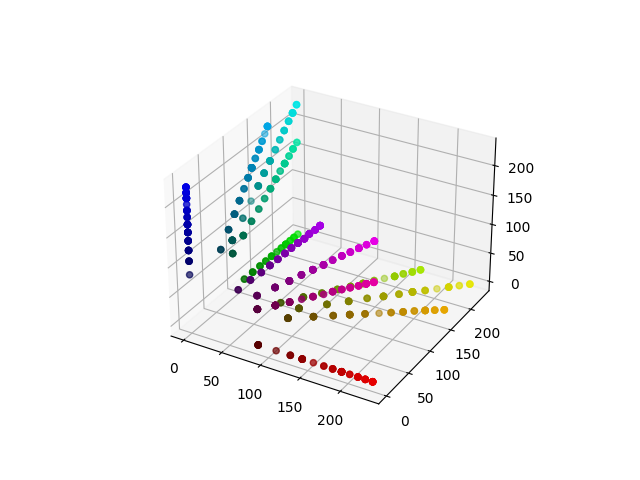

In [ ]:
%matplotlib widget

data = sio.loadmat('corrTrials_60.mat')
colorList = data['corrTrials_60']

t = np.reshape(colorList.astype(np.uint8), (colorList.shape[0]*colorList.shape[1], colorList.shape[2]))

# make a 3d plot of the rgb values in t
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t[:, 0], t[:, 1], t[:, 2], color=t/255)

In [ ]:
meanrank = {}
for hc in range(len(orig_hues)):
    for vc in range(len(orig_vs)):
        ids = np.where((hues == orig_hues[hc]) & (vs == orig_vs[vc]))

        for metric in ranks:
            if hc == 0 and vc == 0:
                meanrank[metric] = np.zeros((len(orig_hues), len(orig_vs)))

            meanrank[metric][hc, vc] = np.mean(ranks[metric][ids])

/home/me/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/me/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


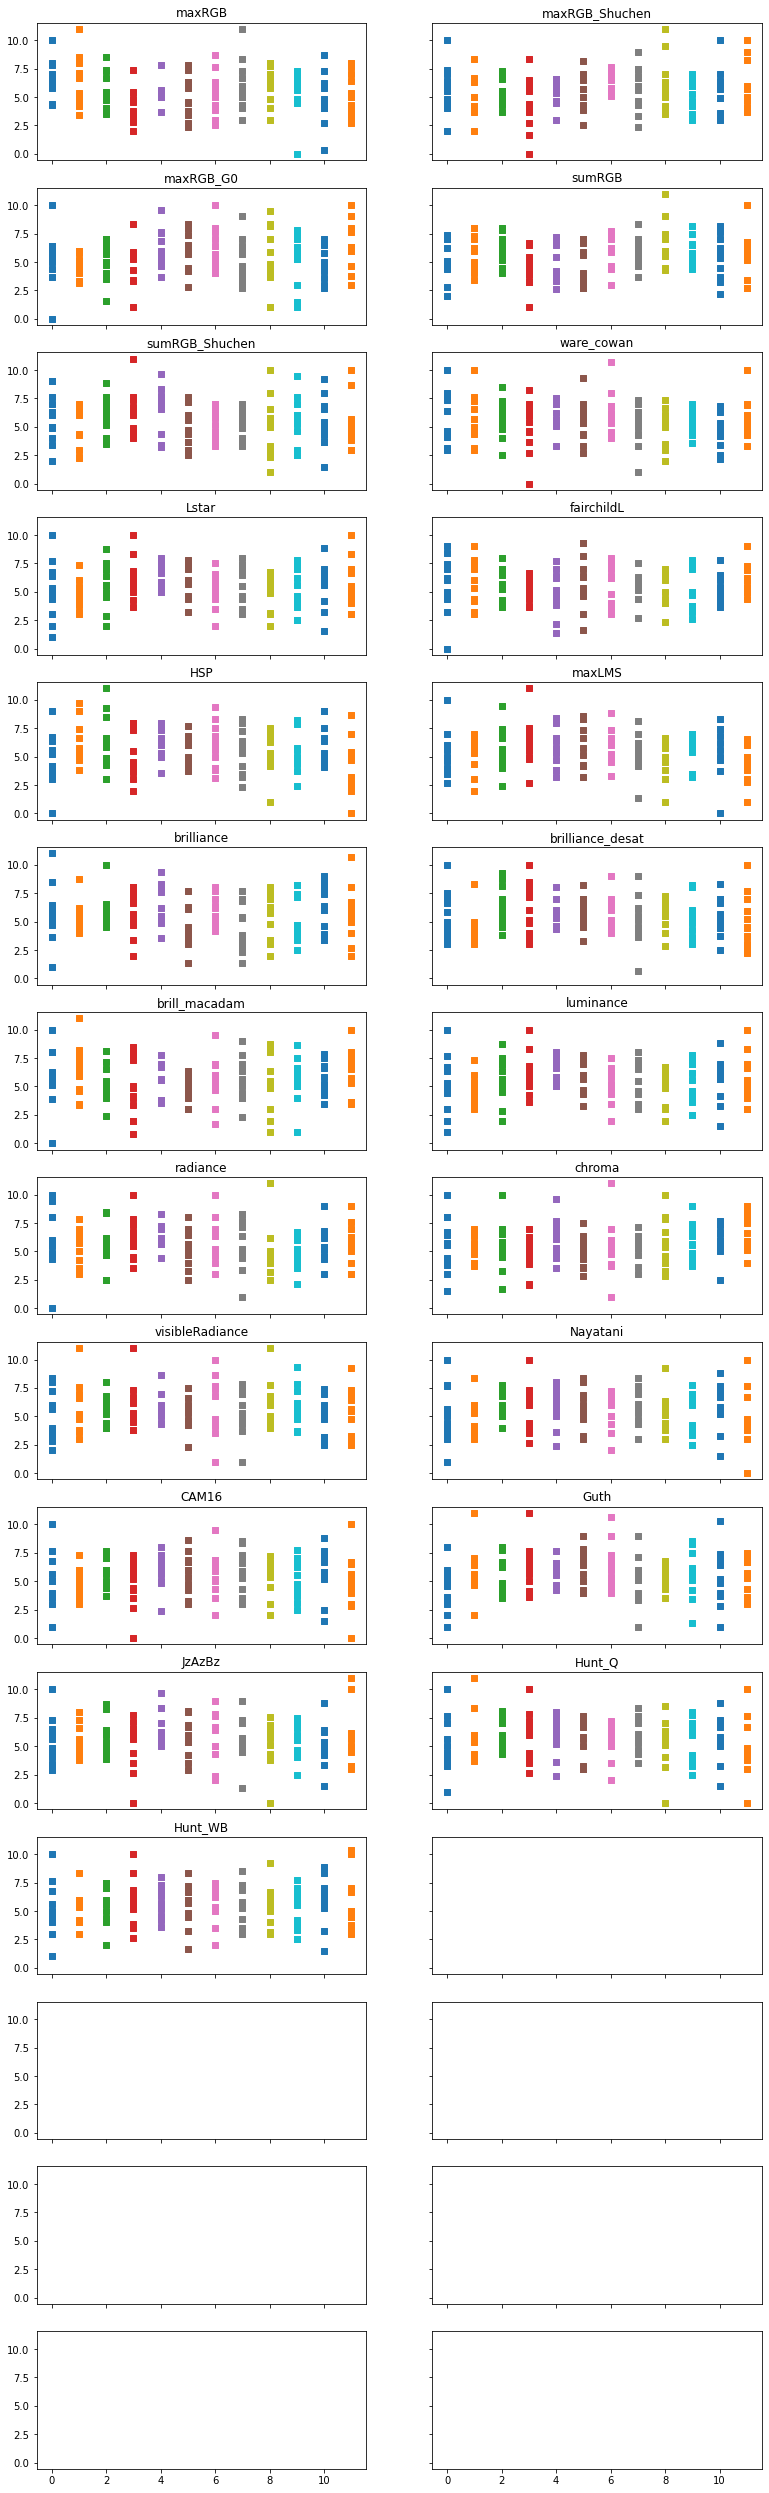

In [ ]:
cc = 0
fig, ax = plt.subplots(15, 2, figsize=(13, 15*3), sharex=True, sharey=True)
ax = ax.flatten()
for metric in meanrank:
    for c in range(len(meanrank[metric])):
        ax[cc].scatter(np.ones(12)*c, meanrank[metric][c, :], marker='s')
        ax[cc].set_title(metric)

    cc += 1

In [ ]:
base = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [0.25, 0.75, 0],
    [0.75, 0.25, 0],
    [0.75, 0, 0.25],
    [0.25, 0, 0.75],
    [0, 0.25, 0.75],
    [0, 0.75, 0.25],
])

rgbs = np.zeros((base.shape[0]*12, 3))
rc = 0
for c in range(base.shape[0]):
    for inten in np.linspace(0, 1, 11):
        rgbs[rc, :] = inten*base[c, :]

        rc += 1

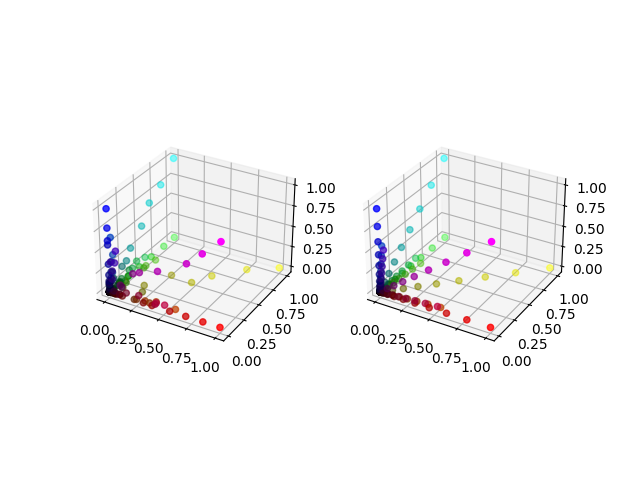

In [ ]:
rgb_gc_rand = np.zeros(rgbs.shape)
rgb_gc = np.zeros(rgbs.shape)
for c in range(len(rgbs)):
    rgb_gc_rand[c, :] = np.power(rgbs[c, :], np.random.rand(3) + 1.5)
    rgb_gc[c, :] = np.power(rgbs[c, :], np.array([2.2, 2.2, 2.2]))

# make a 3d plot of the rgb values in rgb_gc
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(rgb_gc_rand[:, 0], rgb_gc_rand[:, 1], rgb_gc_rand[:, 2], color=rgbs)
ax = fig.add_subplot(122, projection='3d')
ax.scatter(rgb_gc[:, 0], rgb_gc[:, 1], rgb_gc[:, 2], color=rgbs)

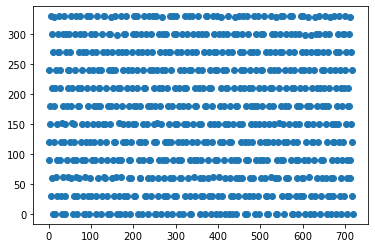

In [ ]:
t = np.reshape(colorList, (colorList.shape[0]*colorList.shape[1], colorList.shape[2]))
r = np.zeros(t.shape)
hs = np.zeros(t.shape[0])
for c in range(len(t)):
    r[c, :] = np.power(t[c]/255, np.array([2.1452, 2.1489, 2.0831]))
    hsv = robsblobs.hsv.rgb2hsv(r[c, :])
    hs[c] = hsv[0]

np.unique(hs)
plt.plot(np.round(hs), 'o')

In [ ]:
np.unique(np.round(hs))

array([   0.,   30.,   60.,   61.,   90.,  120.,  150.,  151.,  180.,
        210.,  240.,  270.,  299.,  300.,  329.,  330.])

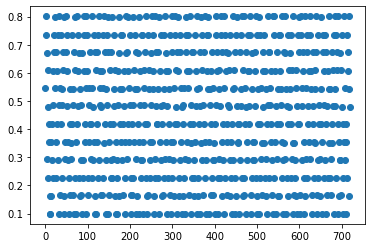

In [ ]:
t = np.reshape(colorList, (colorList.shape[0]*colorList.shape[1], colorList.shape[2]))
r = np.zeros(t.shape)
vs = np.zeros(t.shape[0])
for c in range(len(t)):
    r[c, :] = np.power(t[c]/255, np.array([2.1452, 2.1489, 2.0831]))
    hsv = robsblobs.hsv.rgb2hsv(r[c, :])
    vs[c] = hsv[2]

np.unique(vs)
plt.plot(vs, 'o')

In [ ]:
np.unique(np.round(vs, 3))

array([ 0.099,  0.1  ,  0.164,  0.165,  0.226,  0.227,  0.228,  0.289,
        0.291,  0.293,  0.353,  0.354,  0.418,  0.419,  0.479,  0.484,
        0.543,  0.544,  0.548,  0.606,  0.607,  0.609,  0.672,  0.673,
        0.674,  0.735,  0.736,  0.799,  0.801])